# Estimate spont field in water ice

_Authors: Rachel James (?), Andrew Cassidy (2), David Field (2,3)_

2. [Center for Interstellar Catalysis, Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk/intercat)
3. [Department of Physics and Astronomy, Aarhus University, DK](https://www.phys.au.dk)


In [290]:
# import image module
from IPython.display import Image
from IPython.display import HTML, Markdown
import math
import numpy, pandas 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import openpyxl
import xlrd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize
import pandas as pd
from os import listdir
from collections import defaultdict
import os
from scipy import __version__
import seaborn as sns
import sympy as sp
from sympy import symbols, diff
import cmath

print(os.getcwd())


C:\Users\au302163\OneDrive - Aarhus universitet\Documents\GitHub\VUV_water_spont



### Abstract <a class="anchor" id="abstract"></a>
If water is polarised at all temperature of growth. Below 120 K (ish) this is asscoaited with pores, i.e., amorphous water is polarised becuase of dangling H bonds inside pores. But above 120 K, until desorption, water is also polarised. i.e., crystalline water is polarised. We aim here to see if crystalline water is spontelectric. If so, then the temperature dependence of the field induced shift in VUV peak positions, is caused by the spontectric field. That is, the magnitiude of the field that produces a shift (based on the exciton model) can be explained by fitting the field data with the spontelectric model!

### The how of if<a class="anchor" id="how?"></a>
water was deposited at a range of temperatures and VUV spectra were recorded. Rachel James fit these spectra with Gausians and provided peak positions

We propose that one of these peaks shifts with temperature because some electric field, called E$_{SP}$, acts to expand the size of the exciton related to this peak. The temperature dependence of this effect, *i.e*, the field effect on the size of the exicton is given by **Eqn. 1**

[Eqn. 1]<a class="anchor" id="equation_1"></a>
\begin{align}
\mathrm{(1)} \quad \Delta E = 2 \Delta r E_{SP}
\end{align}

If we start with some value of r and estimate a value for $\Delta E$ from the spectra, we can calculate $E_{SP}$ using the equation in figure 2

### Figure 1: Water VUV spectra at all temperatures  <a class="anchor" id="figure_1"></a>
![Water_VUV_Spectra](images/water_all_markers.png)

Rachel fit these spectra with 2 Gaussians to extact the peak positions, indicated with dots:

![water_G_all](water_spont_peaks.png)
**Figure 2**: We are interested in the last 5 points, above 125 K in this figure. The abosrbances used to find the peak positions in the upper row fal between the two verticle blue lines

This is stage 1 of 4 stages as accurately laid out in figure 3.
### Figure 3: Mind splat in the catalytic space one day  <a class="anchor" id="figure_3"></a>
![mindsplat](images/mindsplat.jpg)


**Stage 1**: Find $E_{SP}$

**Stage 2**: Convert $E_{SP}$ into $(\langle\mu_z\rangle/\mu)$ using:
[Eqn. 2]<a class="anchor" id="equation_2"></a>
\begin{align}
\mathrm{(2)} \quad E_{SP} = E_{A} \langle\mu_z\rangle/\mu
\end{align}

**Stage 3**:
Use the Spontelectric model developed by Frank to derive caluclated values of  $E_{SP}$ and $(\langle\mu_z\rangle/\mu)$; for these assumed values of "r" and $\lambda_{0}$

**Stage 4**:
take the residuals between the calculated and observed values of $E_{SP}$ and/or $(\langle\mu_z\rangle/\mu)$ and use a matrix plot to find the best [r:$\lambda_{0}$]space


### Stage 1: Calculate $E_{SP}$


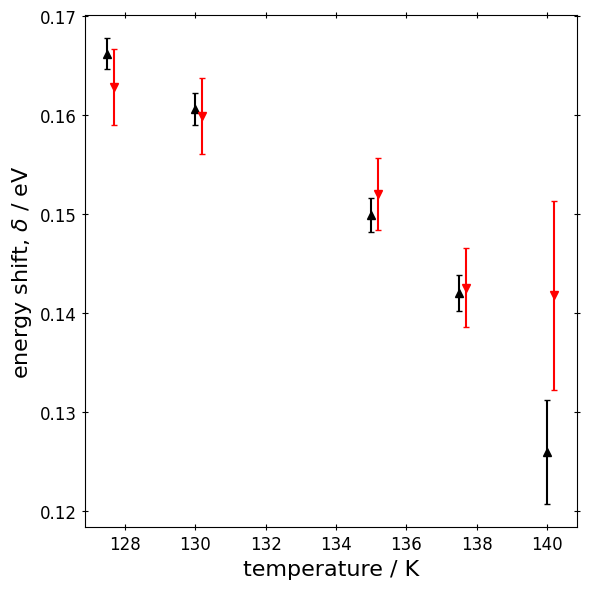

In [328]:
###
### Load data - ie. output from Gaussian fits to VUV spectra
###

#What molecule are we looking at?
name='water'
filename='water_spont_data' #these peak positins come from Gaussian fits to water data. 
df = pd.read_csv(filename+'.csv', header=(0))
#print(df)

l0_eV_lower= 7.91515 -0.025 -0.065  -0.007  #155.925 # lambda_0 in eV    
l0_eV_higher = 8.565402 -0.025 -0.065  #eV when fitting with David, we arbitrarily applied this 0.025 offset to improve the fit
    
xdataraw_higher = (df.iloc[:,0]) #Temperature K
ydataraw_higher = (df.iloc[:,1]) #peak position eV

xdataraw_lower = (df.iloc[:,0]) #Temperature K
ydataraw_lower = (df.iloc[:,2]) #peak position eV

#Define constants from the literature
eps = 1.70712 #- Kofman_2019_ApJ 
mu_0_Debye = 3 # solid state dipole moment since this is known for water and avoids us recalculating it with topping equation
Omega_SI = 17.35e-30 # volume in m**3 from saga et al. (normally calculated based on polarizability, but don't do it this way for water ice).
Omega = Omega_SI*18897259886**3 # convert volume to au
#s_nm = 0.37 # David provided this value
density = 1

#plot the raw data to check it's correct
#plt.plot(xdataraw_143, ydataraw_155,'b+', label = '155 nm')
#plt.plot(xdataraw_143, ydataraw_143,'ko', label = '143 nm')
#plt.plot(xdataraw_155, ydataraw_155,'ko', label = '155 nm')
#plt.legend()
#plt.title('raw data '+ name)
#plt.xlabel('Temperature / K')
#plt.ylabel(r'$\lambda_{T}$ / eV')
#plt.title('water')
#plt.show()

# Now we agree on the data, calculate the energy difference between lambda max ( at each Tdep) and Lambda0 in eV:
DE_eV_higher=ydataraw_higher-l0_eV_higher  ## We should use this one!
DE_eV_lower=ydataraw_lower-l0_eV_lower 

#convert things to atomic units
T=xdataraw_higher*3.16683e-6
DE_higher=DE_eV_higher*0.036749405469679
DE_lower=DE_eV_lower*0.036749405469679

## Figure 4.
## --------

# Create a figure and subplots
fig, ax1 = plt.subplots(figsize=(6, 6))

# Plotting the data on the first subplot (axs[0])
ax1.errorbar(xdataraw_higher, DE_eV_higher, yerr = df['8_5eV_err'], fmt = '^', color = 'black', label='8.65 eV', capsize=2)
ax1.errorbar(xdataraw_lower+0.2, DE_eV_lower, yerr = df['8eV_err'],fmt = 'v', color = 'red', label='7.98 eV', capsize=2)
#ax1.legend(frameon=False)
ax1.set_xlabel('temperature / K',  fontsize=16)
ax1.set_ylabel(r'energy shift, $\delta$ / eV',  fontsize=16)
ax1.tick_params(axis='both', which='both', length=5, labelsize=12, direction='inout')
ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis='x', which='both', direction='inout')
ax1.yaxis.set_tick_params(right=True, labelright=False)
ax1.tick_params(axis='y', which='both', direction='inout')

plt.tight_layout()
plt.savefig('Figure_3.png', format='png')
# Show the plot
plt.show()

#print('energy difference between peak position (eV) and ', l0_eV_higher , '(eV) is: \n', DE_eV_higher)
#print('energy difference between peak position (eV) and ', l0_eV_lower , '(eV) is: \n', DE_eV_lower)




In [346]:
## Set out figure guildlines


def PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm, filename):
    fig, ax = plt.subplots(2, 2, sharex=True, gridspec_kw={'height_ratios':[3,1]}, figsize=(10, 5.4))
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0.02)
        
    #plt.title(ij_space)
    ax[0,0].set_xlim(xmin, xmax)
    #ax[0,0].set_ylim(ymin, ymax)
    ax[0,0].errorbar(Temp, ymodel_E, markersize=10, xerr=sigT, yerr=None, fmt='.', color='red', label='model')
    ax[0,0].scatter(Temp, Eobs, marker='^', s=50, color='blue', label='observed')
        #ax.set_yticks(tick)
    ax[0,0].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax[0,0].xaxis.set_label_position("top")
    ax[0,0].xaxis.tick_top()
    ax[0,0].set_ylabel('Electric Field / Vm$^{-1}$', fontsize=16, fontname='garamond')
    ax[0,0].tick_params(labelsize='large')
    ax[0,0].legend(loc=0, fontsize=14, framealpha=0)
    ax[0,0].text(0.25, 0.25, annotate, transform=ax[0,0].transAxes)
        
    ax[0,1].set_xlim(xmin_mu, xmax_mu)
    #ax[0,1].set_ylim(ymin_mu, ymax_mu)
    ax[0,1].errorbar(Temp, ymodel, markersize=10, xerr=sigT, yerr=sigy, fmt='.', color='red', label='model')
    ax[0,1].scatter(Temp, y, marker='^', s=50, color='blue', label='observed')
    ax[0,1].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax[0,1].xaxis.set_label_position("top")
    ax[0,1].xaxis.tick_top()
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()
    ax[0,1].set_ylabel(r'Dipole orientation / $\mu_Z/\mu$', fontsize=16, fontname='garamond')
    ax[0,1].tick_params(labelsize='large')
    ax[0,1].legend(loc=0, fontsize=14, framealpha=0)
    ax[0,1].text(0,0.8,ij_space+'\n Calculated value of E_A is '+str(round(E_A_Vm/1E9,3))+' x 10^9 V/m',transform=ax[0,0].transAxes)
    #ax[0,1].text(20,0,legend_mu)
    
    ax[1,0].scatter(Temp, res_E, marker='+', s=40, color='red', label='observed')
    ax[1,0].axhline(y = 0.0, color = 'g', linestyle = '-')
    ax[1,0].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax[1,0].set_ylabel('res', fontsize=16, fontname='garamond')
    
    ax[1,1].scatter(Temp, res_mu, marker='+', s=40, color='red', label='observed')
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].axhline(y = 0.0, color = 'g', linestyle = '-')
    ax[1,1].yaxis.tick_right()
    ax[1,1].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    ax[1,1].set_ylabel('res', fontsize=16, fontname='garamond')
    
    plt.savefig(filename)


def PlotSpontelData_paper(Temp,sigT,ymodel_E,Eobs,ymodel,y,sigy, axa, axb):
    
    xmin = np.min(Temp) -2
    xmax = np.max(Temp) +2
    xmin_mu = xmin
    xmax_mu = xmax
        
    axa.set_xlim(xmin, xmax)
    #axa.set_ylim(ymin, ymax)
    axa.plot(Temp, Eobs, 'ko', label='exciton model')
    axa.plot(Temp, ymodel_E, marker='^', color='none', markeredgecolor='r',  label='spontelectric model')
    axa.xaxis.set_ticks_position('both')
    axa.tick_params(axis='x', which='both', length=5,  labelsize = 12, direction='inout')
    #axa.xaxis.set_label_position('bottom')
    #axa.xaxis.tick_top()
    
    axa.tick_params(axis='y', which='both', length=5,  labelsize = 12, direction='inout')
    axa.yaxis.set_tick_params(right=True, labelright=False)
    axa.yaxis.set_major_locator(MaxNLocator(nbins=4))
    #axa.legend(loc=0, fontsize=14, framealpha=0)
    #axa.text(0.25, 0.25, annotate, transform=axa.transAxes)
        
    axb.set_xlim(xmin_mu, xmax_mu)
    #axb.set_ylim(ymin_mu, ymax_mu)
    axb.plot(Temp, y, 'ko',  label='exciton model')
    axb.plot(Temp, ymodel, marker='v', color='none', markeredgecolor='r',label='spontelectric model')
    axb.xaxis.set_ticks_position('both')
    #axb.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
    axb.tick_params(axis='x', which='both', length=5,  labelsize = 12, direction='inout')
    axb.yaxis.set_label_position("right")
    axb.tick_params(axis='y', which='both', length=5,  labelsize = 12, direction='inout')
    axb.yaxis.set_tick_params(right=True, labelleft = False, labelright=True)
    #axb.legend(loc=0, fontsize=14, framealpha=0)

    
    #plt.savefig(filename)
###
### - Define some functions for the exciton model
###

def Solid_phase_dipole(density):
    
    #mu_0_Debye = 3 #fixed for water
    mu_0 = mu_0_Debye/2.54158025
            
    return mu_0
        
def Observed_Esp_David(radius, DE): # r in au
#
# gives the observed value of Espont for some value of radius and the observed value of DE
# NOTE that the value of DE is defined by the measured peak position and the estimated value of lambda_0 
    
    Esp_David = []
    for i in DE:
        Esp_au_David_individual = (1/96)*(-((32*i)/radius)+((16*(2**(1/3))*i*(6+i*eps*radius))/(radius**3 * ((((i**2*eps**2 *radius**(0.5))*(-9+2*i*eps*radius))+3*(3**(0.5))*(-i**3 *eps**3 *(32+i*eps*radius*(13+4*i*eps*radius)))**0.5)/(radius**(9/2)))**(1/3)))+((8*(2**(2/3))*((((i**2 *eps**2 *radius**(0.5))*(-9+2*i*eps*radius))+3*(3**(0.5))*(-i**3 *eps**3 *(32+i*eps*radius*(13+4*i*eps*radius)))**0.5)/(radius**(9/2)))**(1/3))/(eps)))
        #if DE is positive then Esp_au is a complex number and we only want the real solution:
        Esp_David = np.append(Esp_David, 5.14220652e+11*Esp_au_David_individual.real)#Esp_au_David*5.14220652e+11)
        
    return Esp_David

def Franks_pee_function(r, DE): # r in au
    pee = (r*DE)
    
    return pee

def Franks_function_f(r): # r in au
    function_f = 1/12/r/r
    
    return function_f

def Franks_function_g(r,DE): # r in au
    r = float(r)
    function_g=[]
    for i in DE:       
        var_D = (((eps**2)*(Franks_pee_function(r,i)**2)*(-9.0+2.0*(eps*Franks_pee_function(r,i))))+3.0*((3.0)**(0.5))*(-(eps**3)*(Franks_pee_function(r,i)**3)*(32.0+(eps*Franks_pee_function(r,i))*(13.0+4.0*(eps*Franks_pee_function(r,i)))))**(1/2))**(1/3)
        function_g_individual = -4.0*Franks_pee_function(r,i)+((2.0*(2.0**(1/3))*Franks_pee_function(r,i)*(6.0+Franks_pee_function(r,i)*eps))/var_D)+(((2.0**(2/3))*var_D)/eps)
        #if DE is positive then function_g returns a complex number and we only want the real solution:
        function_g=np.append(function_g,function_g_individual.real)
        #print('function_g ',function_g)
    
    return function_g

    
def Franks_function_h(r,DE): # r in au
    r = float(r)
    function_h = []
    for i in DE:
        var_D = (((eps**2)*(Franks_pee_function(r,i)**2)*(-9.0+2.0*(eps*Franks_pee_function(r,i))))+3.0*((3.0)**(0.5))*(-(eps**3)*(Franks_pee_function(r,i)**3)*(32.0+(eps*Franks_pee_function(r,i))*(13.0+4.0*(eps*Franks_pee_function(r,i)))))**(1/2))**(1/3)
        dD_dp = (1/3)*(((Franks_pee_function(r,i)**2)*(eps**2)*(-9.0+2.0*Franks_pee_function(r,i)*eps)+(3.0*(3.0**0.5)*((-(eps**3)*(Franks_pee_function(r,i)**3)*(32.0+(eps*Franks_pee_function(r,i))*(13.0+4.0*(eps*Franks_pee_function(r,i)))))**(1/2))))**(-2/3))*(Franks_pee_function(r,i)*(eps**2)*(-18.0+6.0*Franks_pee_function(r,i)*eps)+1.5*(3.0**0.5)*(1.0/(-(eps**3)*(Franks_pee_function(r,i)**3)*(32.0+(eps*Franks_pee_function(r,i))*(13.0+4.0*(eps*Franks_pee_function(r,i)))))**(1/2))*(-(Franks_pee_function(r,i)**2)*(eps**3)*(96.0+Franks_pee_function(r,i)*eps*(52.0+20.0*Franks_pee_function(r,i)*eps))))
        function_h_individual = (-2.0*Franks_pee_function(r,i)) + ((3.0*(2.0**(4/3))*Franks_pee_function(r,i))/var_D) + (((2.0**(2/3))*var_D)/eps)+((((2.0**(1/3))*Franks_pee_function(r,i)*(6.0+Franks_pee_function(r,i)*eps))/var_D**2)-((2.0**(-1/3))/eps))*(Franks_pee_function(r,i)*dD_dp)
        #print(function_h_individual)
        #if DE is positive then function_h returns a complex number and we only want the real solution:
        function_h=np.append(function_h,function_h_individual.real)
       
    return function_h
    
def Observed_Esp(r,DE): # r in au
#
# gives the observed value of Espont for some value of radius and the observed value of DE, using the method developed by Frank
# NOTE that the value of DE is defined by the measured peak position and the estimated value of lambda_0 
 
    Esp_au= Franks_function_f(r)*Franks_function_g(r,DE) #in au
    Esp = (Esp_au*5.14220652e+11) #convert observed E_sp to V/m
    
    return Esp

###
###  - Define the relevant functions for the Spont model
###

def Langevin(x):
#
# the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^3)
#
    #print('argument sent to Langevin ',x)
    if (abs(x)>1.0e-6) :
        #print('running coth function')
        y=math.cosh(x)/math.sinh(x)-1/x
    else :
        y=x/3.0
    return y

def DerLangevin(x):
#
# the derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=-1.0*auxden*auxden+1.0/x/x
    else :
        y=1.0/3.0
    return y

def DDerLangevin(x):
#
# the second derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=2.0*(math.cosh(x)*auxden*auxden*auxden-1.0/x/x/x)
    else :
        y=0.0
    return y

def LangevInv(y):
#
# the inverse of the Langevin function for a single real argument y
# this uses an expression derived by Petrosyan (2017)
# 02/06/2022 (FPP): the approximation is only correct for positive values of the argument, so
#   in order to also work for negative values I have modified the function.
#
    if (abs(y)<1.0) :
        yab=abs(y)
        x=y*(3.0+yab*math.sin(7.0*yab/2.0)/5.0+yab*yab/(1-yab))
        return x
    else :
        print("LangevInv: argument out of range, stopping.")
        return

def DerLangevInv(y):
#
# the derivative of the inverse of the Langevin function for a single real argument y
# this uses an expression for the inverse of the Langevin function derived by Petrosyan (2017)
# 02/06/2022 (FPP): the approximation is only correct for positive values of the argument, so
#   in order to also work for negative values I have modified the function.
#
    if (abs(y)<1.0) :
        yab=abs(y)
        x=3.0+2.0*yab*math.sin(7.0*yab/2.0)/5.0+7.0*yab*yab*math.cos(7.0*yab/2.0)/10.0
        x+=(3.0-2.0*yab)*yab*yab/(1-yab)/(1-yab)
        return x
    else :
        print("DerLangevInv: argument out of range, stopping.")
        return
    
def NeaterOut(x,s):
#
# prepares the strings for providing nicer-looking output of parameters with uncertainties
    
    spon=math.floor(math.log10(abs(s)))+1
    divis=math.exp(spon*math.log(10))
    xout=x/divis
    sout=s/divis
    string=r'({0:.10f}$\pm${1:.2f}) $10^{2:n}$'.format(xout,sout,spon)
    return string

def ConstrLSQ(x,y,wht):
#
# Solve a linear least squares problem for 1 dependent variable y as a function of
# nvar independent variables x.
# Linear least-squares problems for more than 1 parameter require a matrix inversion
# Here for arbitrary numbers of parameters the required matrix elements are 
# calculated and the matrix is inverted, after which the parameters are obtained.
# Input: a matrix x[nvar,ndat] containing ndat measurements of nvar independent
#           variables x
#        a vector y[ndat] containing the dependent variable
#        a vector of weights [ndat] which is used to give particular measurements 
#           less weight if desired. 
# NOTE: if a constant offset is required as one of the free parameters, an x-variable 
# which is all 1's must be present in (added to) the input matrix x.
#
    if (x.shape[1] != y.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return
    if (x.shape[1] != wht.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return

#
# declaration of local variables
    ndat=x.shape[1]
    nvar=x.shape[0]
    whtsum=0.0
    ysum=0.0
    xsum=numpy.array([0.0]*nvar)
    xysum=numpy.array([0.0]*nvar)
    xsqsum=numpy.array([[0.0]*2,[0.0]*2])
    Ainv=numpy.array([[0.0]*2,[0.0]*2])
    par=numpy.array([0.0]*nvar)
#
# weighted sum of measurements of dependent variable 
    for i in range(0,ndat):
        ysum+=y[i]*wht[i]
#
# weighted sum of measurements of independent variables and of cross-products on independent variables
# with each other and with dependent variable.
    for k in range(0,nvar):
        for i in range(0,ndat):
            whtsum+=wht[i]
            xsum[k]+=x[k,i]*wht[i]
            xysum[k]+=x[k,i]*y[i]*wht[i]
        for l in range(0,nvar):
            for i in range(0,ndat):
                xsqsum[k,l]+=x[k,i]*x[l,i]*wht[i]
#
# start solving the set of linear equations for the linear least squares problem
    if (nvar==1) :
        #
# if only one parameter to be determined
        par[0]=ysum/xsum[0]
    else:
#
# for determination of 2 parameters
        if (nvar==2) :
            Det=xsqsum[0,0]*xsqsum[1,1]-xsqsum[1,0]*xsqsum[0,1]
            if (abs(Det)>1.0e-9) :
                Ainv[0,0]=xsqsum[1,1]/Det
                Ainv[0,1]=-1.0*xsqsum[0,1]/Det
                Ainv[1,0]=-1.0*xsqsum[1,0]/Det
                Ainv[1,1]=xsqsum[0,0]/Det
                par[0]=Ainv[0,0]*xysum[0]+Ainv[0,1]*xysum[1]
                par[1]=Ainv[1,0]*xysum[0]+Ainv[1,1]*xysum[1]
                
                #print('Es is ',par[0]*5.142e11,'\nzeta is ',par[1]/par[0])
            
            else :
                print("ConstrLSQ: singular matrix. stopping")
                par=numpy.array([])
                return
        else :
#
# the general case of 3 or more parameters to be determined.
            Ainv=numpy.linalg.inv(xsqsum)
            par=numpy.dot(Ainv,xysum)
            #
            
    return par

# Define several conversion factors to/from atomic units
# conversion of Temp to a.u. : T [a.u.]= T [K]/factor
Ttoau=315770.0
# conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
Debye=0.393456
# Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
Etoau=5.142e11
#

###
### - Define the Newton Raphson method
###

def newton_raphson(function_to_minimise, der_function_to_minimise, r_0, tol): #Taken from copilot # r, first guess
    y = calc_Esp(r_0,DE)
    
    while abs(function_to_minimise(r_0)) > tol:
        r_0 = r_0 - function_to_minimise(r_0)/der_function_to_minimise(r_0)
    
    r_nm = r / 18.897259886
    return r_nm

def function_to_minimise(r_0):  # r in au
    r_0 = float(r_0)
    y = calc_Esp(r_0,DE)
    
    result = Franks_function_h(r_0,DE)*(y - Franks_function_f(r_0)*Franks_function_g(r_0,DE))
    #plt.plot(DE,result, label = r_0/18.897259886)
    #plt.legend()
    
    function_to_minimise_result = np.sum(result)
    keep_results.append((r_0, function_to_minimise_result)) 
    return function_to_minimise_result

def der_function_to_minimise(r_0):  # r in au
    der_function_to_minimise_result = 0 #for storing the sum result
    r_0 = float(r_0)
    y = calc_Esp(r_0,DE)  
    dh_dp = []
    dg_dp = []
        
    for i in DE :
        
        if i>0 :
            var_D_i = (((eps**2)*(Franks_pee_function(r_0,i)**2)*(-9.0+2*(eps*Franks_pee_function(r_0,i))))+3.0*((3.0)**(0.5))*(-(eps**3)*(Franks_pee_function(r_0,i)**3)*(32.0+(eps*Franks_pee_function(r_0,i))*(13.0+4.0*(eps*Franks_pee_function(r_0,i)))))**(1/2))**(1/3)
            #var_D_i = var_D_i_complex.real
            
            dD_dp_i = (1/3)*(((Franks_pee_function(r_0,i)**2)*(eps**2)*(-9.0+2.0*Franks_pee_function(r_0,i)*eps)+(3.0*(3.0**0.5)*((-(eps**3)*(Franks_pee_function(r_0,i)**3)*(32.0+(eps*Franks_pee_function(r_0,i))*(13.0+4.0*(eps*Franks_pee_function(r_0,i)))))**(1/2))))**(-2/3))*(Franks_pee_function(r_0,i)*(eps**2)*(-18.0+6.0*Franks_pee_function(r_0,i)*eps)+1.5*(3.0**0.5)*(1.0/(-(eps**3)*(Franks_pee_function(r_0,i)**3)*(32.0+(eps*Franks_pee_function(r_0,i))*(13.0+4.0*(eps*Franks_pee_function(r_0,i)))))**(1/2))*(-(Franks_pee_function(r_0,i)**2)*(eps**3)*(96.0+Franks_pee_function(r_0,i)*eps*(52.0+20.0*Franks_pee_function(r_0,i)*eps))))
            #dD_dp_i = dD_dp_i_complex.real
            
            ddD_dpp_i = ((eps**2 * Franks_pee_function(r_0,i)**2 *(-9.0+2.0*eps*Franks_pee_function(r_0,i))+3.0*3.0**0.5 *(-eps**3 * Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5)**(1/3) *(16.0 * 3.0**0.5 * (-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5 - eps*Franks_pee_function(r_0,i)*( 48.0*(32.0+3.0**0.5*(-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5) + eps*Franks_pee_function(r_0,i)*(eps*Franks_pee_function(r_0,i)*(444.0+3.0*eps*Franks_pee_function(r_0,i)*(29.0+4.0*eps*Franks_pee_function(r_0,i))+2.0*3.0**0.5 * (-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5) + 3.0*(336.0+5.0*3.0**0.5 *(-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5))))) / ((eps*Franks_pee_function(r_0,i)**3 *(6.0+eps*Franks_pee_function(r_0,i))*(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i)))**2))
            #dD_dpp_i = ddD_dpp_i_complex.real
            
            dh_dp_i = -2.0 + ((3.0*(2.0**(4/3)))/var_D_i) + (((3.0*(2.0**(1/3))*Franks_pee_function(r_0,i)**2*eps)/var_D_i**2)+(2.0**(-1/3)/eps))*dD_dp_i - (((2.0**(4/3))*Franks_pee_function(r_0,i)*(6.0+Franks_pee_function(r_0,i)*eps))/var_D_i**3)*(dD_dp_i**2) + ((((2.0**(1/3))*Franks_pee_function(r_0,i)*(6.0+Franks_pee_function(r_0,i)*eps))/var_D_i**2)-(2.0**(-1/3)/eps))*ddD_dpp_i
            
            #dh_dp_i = dh_dp_i_complex.real
            dg_dp_i = 1.45483151462896*eps*Franks_pee_function(r_0, i)/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3 * (eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.333333333333333 + 1.45483151462896*Franks_pee_function(r_0, i)*(eps*Franks_pee_function(r_0, i) + 6.0)*(-0.128300059819917*eps**3*Franks_pee_function(r_0, i)**2 - 0.128300059819917*eps**2*Franks_pee_function(r_0, i)*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + 0.333333333333333*(-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5*(-0.5*eps**3*Franks_pee_function(r_0, i)**3*(4.0*eps**2*Franks_pee_function(r_0, i) + eps*(4.0*eps*Franks_pee_function(r_0, i) + 13.0)) - 1.5*eps**3*Franks_pee_function(r_0, i)**2*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))/(eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0)))/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**1.33333333333333 + 1.45483151462896*(eps*Franks_pee_function(r_0, i) + 6.0)/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.333333333333333 - 4.0 + 2.7494592739972*(0.128300059819917*eps**3*Franks_pee_function(r_0, i)**2 + 0.128300059819917*eps**2*Franks_pee_function(r_0, i)*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) - 0.333333333333333*(-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5*(-0.5*eps**3*Franks_pee_function(r_0, i)**3*(4.0*eps**2*Franks_pee_function(r_0, i) + eps*(4.0*eps*Franks_pee_function(r_0, i) + 13.0)) - 1.5*eps**3*Franks_pee_function(r_0, i)**2*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))/(eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0)))/(eps*(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.666666666666667)
            #dg_dp_i = dg_dp_i_complex.real
            
            dh_dp = np.append(dh_dp,dh_dp_i)
            
            dg_dp = np.append(dg_dp,dg_dp_i)   

        else:
            
            col_C_sqrt = -(eps**3)*(Franks_pee_function(r_0,i)**3)*(32.0+(eps*Franks_pee_function(r_0,i))*(13.0+4.0*(eps*Franks_pee_function(r_0,i))))
            col_C = (-(eps**3)*(Franks_pee_function(r_0,i)**3)*(32.0+(eps*Franks_pee_function(r_0,i))*(13.0+4.0*(eps*Franks_pee_function(r_0,i)))))**(1/2)
            var_D = (((eps**2)*(Franks_pee_function(r_0,i)**2)*(-9.0+2.0*(eps*Franks_pee_function(r_0,i))))+3.0*((3.0)**(0.5))*col_C)**(1/3)
            dD_dp = (1/3)*(((Franks_pee_function(r_0,i)**2)*(eps**2)*(-9.0+2*Franks_pee_function(r_0,i)*eps)+(3.0*(3.0**0.5)*(col_C)))**(-2/3))*(Franks_pee_function(r_0,i)*(eps**2)*(-18.0+6.0*Franks_pee_function(r_0,i)*eps)+1.5*(3.0**0.5)*(1.0/col_C)*(-(Franks_pee_function(r_0,i)**2)*(eps**3)*(96.0+Franks_pee_function(r_0,i)*eps*(52.0+20.0*Franks_pee_function(r_0,i)*eps))))
            ddD_dpp = ((eps**2 * Franks_pee_function(r_0,i)**2 *(-9.0+2.0*eps*Franks_pee_function(r_0,i))+3.0*3.0**0.5 *(-eps**3 * Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5)**(1/3) *(16.0 * 3.0**0.5 * (-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5 - eps*Franks_pee_function(r_0,i)*( 48.0*(32.0+3.0**0.5*(-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5) + eps*Franks_pee_function(r_0,i)*(eps*Franks_pee_function(r_0,i)*(444.0+3.0*eps*Franks_pee_function(r_0,i)*(29.0+4.0*eps*Franks_pee_function(r_0,i))+2.0*3.0**0.5 * (-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5) + 3.0*(336.0+5.0*3.0**0.5 *(-eps**3 *Franks_pee_function(r_0,i)**3 *(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i))))**0.5))))) / ((eps*Franks_pee_function(r_0,i)**3 *(6.0+eps*Franks_pee_function(r_0,i))*(32.0+eps*Franks_pee_function(r_0,i)*(13.0+4.0*eps*Franks_pee_function(r_0,i)))**2))
            dh_dp = -2.0 + ((3.0*(2**(4/3)))/var_D) + (((3.0*(2.0**(1/3))*Franks_pee_function(r_0,i)**2*eps)/var_D**2)+(2.0**(-1/3)/eps))*dD_dp - (((2.0**(4/3))*Franks_pee_function(r_0,i)*(6.0+Franks_pee_function(r_0,i)*eps))/var_D**3)*(dD_dp**2) + ((((2.0**(1/3))*Franks_pee_function(r_0,i)*(6.0+Franks_pee_function(r_0,i)*eps))/var_D**2)-(2.0**(-1/3)/eps))*ddD_dpp
            dg_dp = 1.45483151462896*eps*Franks_pee_function(r_0, i)/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.333333333333333 + 1.45483151462896*Franks_pee_function(r_0, i)*(eps*Franks_pee_function(r_0, i) + 6.0)*(-0.128300059819917*eps**3*Franks_pee_function(r_0, i)**2 - 0.128300059819917*eps**2*Franks_pee_function(r_0, i)*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + 0.333333333333333*(-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5*(-0.5*eps**3*Franks_pee_function(r_0, i)**3*(4.0*eps**2*Franks_pee_function(r_0, i) + eps*(4.0*eps*Franks_pee_function(r_0, i) + 13.0)) - 1.5*eps**3*Franks_pee_function(r_0, i)**2*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))/(eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0)))/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**1.33333333333333 + 1.45483151462896*(eps*Franks_pee_function(r_0, i) + 6.0)/(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.333333333333333 - 4.0 + 2.7494592739972*(0.128300059819917*eps**3*Franks_pee_function(r_0, i)**2 + 0.128300059819917*eps**2*Franks_pee_function(r_0, i)*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) - 0.333333333333333*(-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5*(-0.5*eps**3*Franks_pee_function(r_0, i)**3*(4.0*eps**2*Franks_pee_function(r_0, i) + eps*(4.0*eps*Franks_pee_function(r_0, i) + 13.0)) - 1.5*eps**3*Franks_pee_function(r_0, i)**2*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))/(eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0)))/(eps*(0.192450089729875*eps**2*Franks_pee_function(r_0, i)**2*(2.0*eps*Franks_pee_function(r_0, i) - 9.0) + (-eps**3*Franks_pee_function(r_0, i)**3*(eps*Franks_pee_function(r_0, i)*(4.0*eps*Franks_pee_function(r_0, i) + 13.0) + 32.0))**0.5)**0.666666666666667)      
        
    #print('dh_dp', dh_dp)    
    #print('dg_dp', dg_dp)    
    result = y*DE*dh_dp - Franks_function_f(r_0)*Franks_function_g(r_0,DE)*Franks_function_h(r_0,DE)*((-2.0/r_0)+DE*(((1.0/Franks_function_g(r_0,DE))*dg_dp)+((1.0/Franks_function_h(r_0,DE))*dh_dp)))
    #print('result',result)     
    der_function_to_minimise_result = np.sum(result)
                
    return der_function_to_minimise_result


In [348]:
def calc_Esp(r_au, DE): # r in au
    r_i=str(r_au/18.897259886) #used for labelling graphs below
    l0_j=str(l0)  #used for labelling graphs below
    ij_space=('radius: '+r_i+' nm - and l0: '+l0_j+' eV')
    print(ij_space)
    #print('running calc_Esp with r = ',r_au,' and DE = ',DE)
    
    ##First; run the exciton model to find observed values    
    
    # Initialize 2D arrays to store the results
    Observed_field_David = np.zeros(len(DE))
    Observed_field = np.zeros(len(DE))
    Observed_alignment = np.zeros(len(DE))
    SpontelData = pd.DataFrame(columns=['weight', 'y', 'sigma_y', 'calc_y','Temperature', 'sigma_T', 'Observed_field','Calc_field'])
    SpontelData['Temperature'] = xdataraw
    SpontelData['sigma_T'] = [1] * len(SpontelData['Temperature'])
    
    ## Convert Esp to muz/mu0 values using a fixed value for EA 

    ## Define E_A
    # Find the value of mu for this ice 
    IceMu = Solid_phase_dipole(density)*2.541746
    print('IceMu is ',IceMu)
    E_A=-4*np.pi*(Solid_phase_dipole(density))/Omega
    E_A_Vm = E_A*5.14220652e+11
    print('Calculated value of E_A for '+name+' is ', E_A_Vm/1E9, 'x 10^9 V/m')

    # Get observed values for a starting value of r in au
    Observed_field = Observed_Esp(r_au, DE)       
    Observed_alignment = Observed_field/E_A_Vm       
        
    #store these outputs in dataframes
    SpontelData['Observed_field'] = (Observed_field)
    SpontelData['y'] = (Observed_alignment)
    SpontelData['sigma_y'] = abs(SpontelData['y'] * 0.01)
    #print(SpontelData)
    
    SpontelData['weight'] = [1] * len(SpontelData['Temperature'])  

    ###
    ### - then run spontelectric model to find calculated values
    ###
        
    #Only need htfc if zeta is not constant with temperature
    htfc=numpy.array([0.0]*4)    
    htfc[0]=1.0
    htfc[1]=0.0
    htfc[2]=0.0
    htfc[3]=0.0
    
    # Provide a first guess value for the parameter E_A
    EAnxt= E_A_Vm #take the calculated value of EA in V/m

    weight=numpy.array(SpontelData.weight)
    ndata=len(weight)

    # here comes a block of variable declarations
    whtsum=0.0
    yinvmn=0.0
    hTfunc=numpy.array([0.0]*ndata)
    DerhTfunc=numpy.array([0.0]*ndata)
    DerGT=numpy.array([0.0]*ndata)
    DerGy=numpy.array([0.0]*ndata)
    PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
    ydat=numpy.array([0.0]*ndata)
    zdat=numpy.array([0.0]*ndata)
    ymodel=numpy.array([0.0]*ndata)
    DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
    SigPar=numpy.array([0.0]*3)   
    
    # y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
    # sig are the 1-sigma measurement errors
    # E observed is the observed Electric field in units [V/m]
    y=numpy.array(SpontelData.y)
    sigy=numpy.array(SpontelData.sigma_y)
    Temp=numpy.array(SpontelData.Temperature)
    sigT=numpy.array(SpontelData.sigma_T)
    Eobs=numpy.array(SpontelData.Observed_field)

        # Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
    # These are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
    # partial derivatives of the function G with respect to T and y.
    for i in range(0,ndata):
        yinvmn+=weight[i]/y[i]
        whtsum+=weight[i]
        hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
        DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
        PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
        PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
        PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
        PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
    #
    # start the iteration to get the parameters, initialise a choice for E_A
    
    #print('PartDerv',PartDerv)
    yinvmn=yinvmn/whtsum
    
    EAcur=1.1*EAnxt
    itcnt=0
    while ((abs(EAnxt/EAcur-1.0)>1.0e-4) and (itcnt<20)) :
        itcnt+=1
        EAcur=EAnxt
        #print('EAcur is ',EAcur)
        for i in range(0,ndata):
            xdat[0,i]=PartDerv[1,i]
            xdat[1,i]=PartDerv[3,i]
            
            ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
        #print('xdat',xdat,
        #      '\nydat ',ydat)    
        Constrout=ConstrLSQ(xdat,ydat,weight)
        #print('Constrout',Constrout*Etoau)
    #
    # E_S and zeta always are forced to be >= 0
        EScur=abs(Constrout[0]*Etoau)
        ESzetacur=abs(Constrout[1]*Etoau)
                
        ratiolog=0.0
        for i in range(0,ndata) :
            Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
            ratiolog+=weight[i]*(math.log(abs(EAcur*Langevin(Ezmod)))-math.log(Eobs[i]))
            DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
            DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
            DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
            DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog=ratiolog/whtsum
        
        ####
        #### --- insert visualise output here --- ####
        ####
                
        dlsqsum=0
        #Observed_alignment = Observed_field/EAcur ##invetn
        #SpontelData['y'] = (Observed_alignment) ##invetn
        #y=numpy.array(SpontelData.y) ##invetn
        for i in range(0,ndata) :
            ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
            DelMod=y[i]-ymodel[i]
            dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
            DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
            DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
            DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
            DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
            DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
            DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
        #
        dlsqsum=dlsqsum/(whtsum-2)
        # calculate the 1-sigma uncertainties for the parameters
        SigPar=numpy.array([0.0]*3)
        for k in range(0,3):
            for i in range(0,ndata) :
                SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
            SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)
  
        zetacur=ESzetacur/EScur
        ymodel_E=EAcur*ymodel
        SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
        
        #define residuals for plot (just for visualising)
        res_E=Eobs-ymodel_E
        res_mu=y-ymodel
    
        r_i=str(r_au/18.897259886) #used for labelling graphs below
        l0_j=str(l0)  #used for labelling graphs below
        short_ij=('r_'+str(r_i)+'_lambda0_'+str(l0))

        #Define text to print on each graph               
        string = ""
        string = 'Spont fit parameters'
        string+="\n"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
        string+="\n"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
        string+="\n"+r"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
        string+="\n\n"+r"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"\n"
        annotate=(string)
            
        ES=NeaterOut(EScur,SigPar[0])
        EA=NeaterOut(EAcur,SigPar[1])
        zeta=NeaterOut(zetacur,SigPar[2])
    
        os.chdir('visualise')
        filename = (short_ij+'-'+str(itcnt)+'.png')
        #PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm, filename)
        os.chdir('..')
        
        ###
        ###   ---- End visualise --- ###
        ###
        
        if ((Constrout[0]<0) and (EAcur<0) and (yinvmn<0) and (ratiolog>0)) :
            
            EAnxt=EAcur+2.0*yinvmn*EScur
            
        else :
            #exp_ratiolog = (math.exp(ratiolog))  ##invetn
            #print(exp_ratiolog) ##invetn
            #if 0.1 <= exp_ratiolog <= 500:##invetn
            EAnxt=EAcur/math.exp(ratiolog) #on this condition, iterate
            #else:##invetn
             #   EAnxt = EAcur*1.1 ##invetn
            
        if (itcnt>20) : 
            print ("iteration count exceeded: not converged")
            
    # also calculate the quality of the fit (chi-square) dlsqsum

    dlsqsum=0
    
    ## suppose we re use the new EAcur to reevaluate the values for Eobs:
    #Observed_alignment = Observed_field/EAcur
    #SpontelData['y'] = (Observed_alignment)
    #y=numpy.array(SpontelData.y)
    
    for i in range(0,ndata) :
        #print('converged result before sending to langevin \ny[i] ',y[i], '\nIceMu ',IceMu,'\nEScur ',str(EScur),'\nEAcur ',str(EAcur),'\nESzetacur ',str(ESzetacur),'\nHTfunc[i] ',hTfunc[i],'\nTemp ',Temp[i])
        ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
        DelMod=y[i]-ymodel[i]
        dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
            #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
        DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
        DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
        DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
        DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
        DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
        DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
    #
    dlsqsum=dlsqsum/(whtsum-2)
    # calculate the 1-sigma uncertainties for the parameters
    SigPar=numpy.array([0.0]*3)
    for k in range(0,3):
        for i in range(0,ndata) :
            SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
        SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)
  
    zetacur=ESzetacur/EScur
    ymodel_E=EAcur*ymodel
   
    SpontelData['calc_y'] = ymodel
    SpontelData['Calc_field'] = ymodel_E

    #Define text to print on each graph
    SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
    string = ""
    string = 'Spont fit parameters - '
    string+=str(dataset)
    string+="\n"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
    string+="\n"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
    string+="\n"+r"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
    string+="\n\n"+r"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"\n"

    #save the fitting parameters to csv file
    parameter_frame = pd.DataFrame({'E_a': [EAcur],'E_s': [EScur],'zeta': [zetacur]})
    folder_path = "observed_data"
    os.makedirs(folder_path, exist_ok=True)
    parameter_file_name = os.path.join(folder_path, which_peak+'_'+str(r_i) + '_parameters.csv')
    parameter_frame.to_csv(parameter_file_name, index=False)  
    
    annotate=(string)

    #define residuals for plot (just for visualising)
    res_E=Eobs-ymodel_E
    res_mu=y-ymodel
    
    r_i=str(r_au/18.897259886) #used for labelling graphs below
    l0_j=str(l0)  #used for labelling graphs below

    #print('the observed values of m are ', y)
    #print('the observed values of E are ', Eobs)
    #print('the calculated values of m are ', ymodel)
    #print('the calculated values of E are ', ymodel_E)
    short_ij=('r_'+str(r_i)+'_lambda0_'+str(l0))
    #plt.savefig('Spont fit for'+short_ij+'.png')    
    
    zetacur=ESzetacur/EScur
        
    SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
    string = name
    string+="<br>"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
    string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
    string+="<br>"+r"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
    string+="<br><br>"+r"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
    #display(Markdown(string)) #Use this line to see the individual results for fitting parameters per dataset
    
    ES=NeaterOut(EScur,SigPar[0])
    EA=NeaterOut(EAcur,SigPar[1])
    zeta=NeaterOut(zetacur,SigPar[2])
    
    #print(ij_space)
    SpontelData['DE_eV'] = DE_eV
    #print(SpontelData)
    #save the data frame

    spont_file_name = os.path.join(folder_path, which_peak+'_'+str(r_i) + '_spont.csv')
    # Use the concatenated string as the file path
    SpontelData.to_csv(spont_file_name, index=False)
    
    print('finished spont fit model')
    #PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm, filename)
        
    #PlotSpontelData_paper(Temp,sigT,ymodel_E,Eobs,ymodel,y,sigy,'spont_paper_figure.png')
         
    return(SpontelData['Calc_field'])
    #os.chdir('..')

All files in 'observed_data' have been deleted.
radius: 9.5 nm - and l0: 8.475402 eV
IceMu is  3.000195645996226
Calculated value of E_A for water is  -65.14495972576292 x 10^9 V/m
finished spont fit model
radius: 9.75 nm - and l0: 8.475402 eV
IceMu is  3.000195645996226
Calculated value of E_A for water is  -65.14495972576292 x 10^9 V/m
finished spont fit model
radius: 10.0 nm - and l0: 8.475402 eV
IceMu is  3.000195645996226
Calculated value of E_A for water is  -65.14495972576292 x 10^9 V/m
finished spont fit model
Using this value of E_A for the 7.9 eV peak at 9 nm radius;  -65.14495972576292 x 10^9 V/m


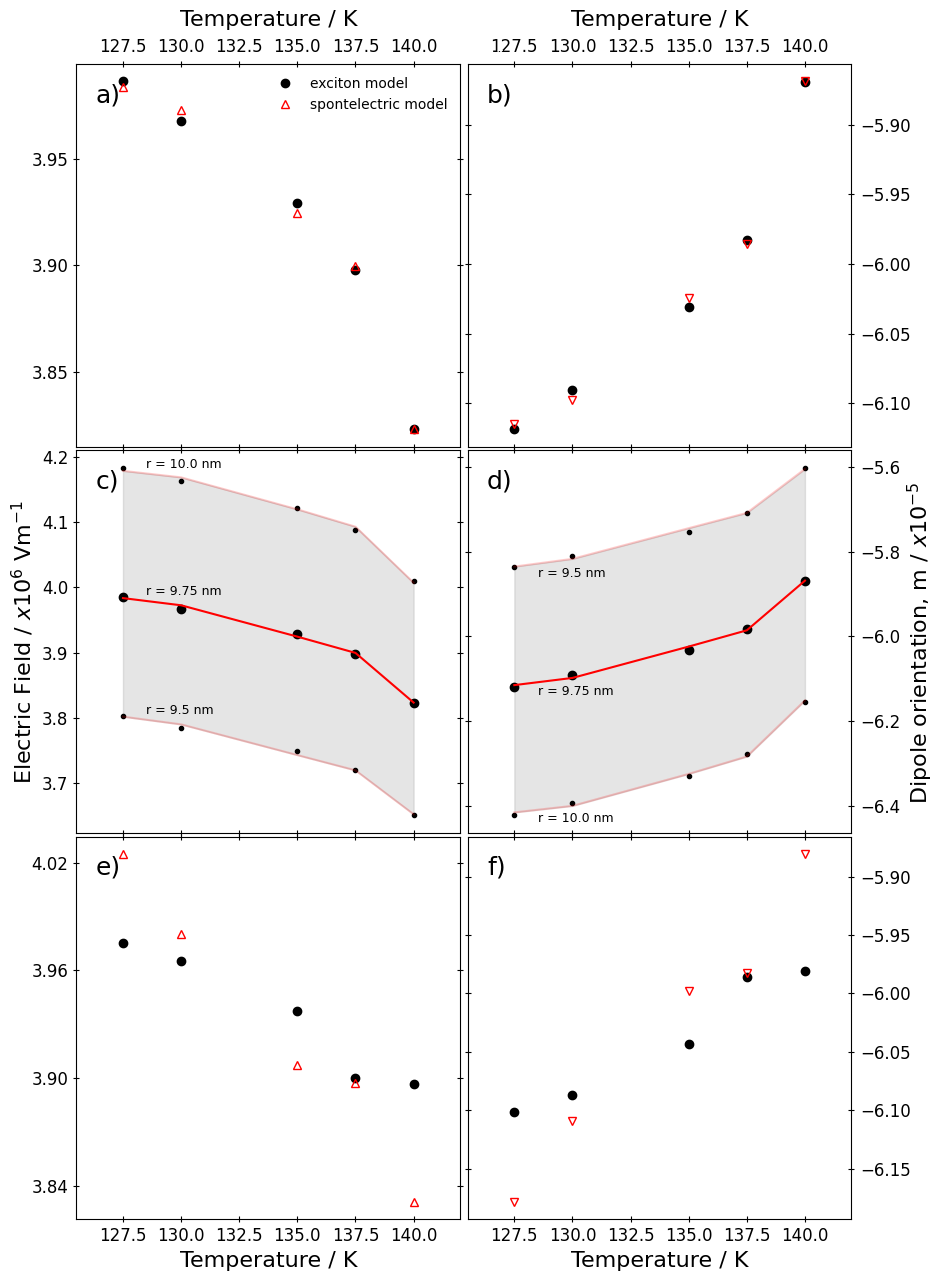

In [354]:
r_nm = (9.5, 9.75, 10.0)

# Specify the directory
dir_path = 'observed_data'

# Check if the directory exists
if os.path.exists(dir_path):
    # Use glob to match the pattern ‘*’ (all files)
    files = glob.glob(f'{dir_path}/*')
    
    # Use os.remove() to remove each file
    for f in files:
        os.remove(f)
    print("All files in 'observed_data' have been deleted.")
else:
    print("The directory 'observed_data' does not exist.")

# Create a single plot with data from all dataframes
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex='col')
fig.subplots_adjust(wspace=0.02, hspace=0.01)

#first get the fit for the higher energy peak
DE = DE_higher
DE_eV = DE_eV_higher
xdataraw = xdataraw_higher   
which_peak = '8_6' 

for i in r_nm:
    r_0 = i*18.897259886 #convert radius_nm to au139.6764#
    #print('radius in au ',r_0)
    check = calc_Esp(r_0,DE)



data_files = glob.glob('observed_data/8***spont.csv')

spont_fit1_min = pd.read_csv(data_files[0],  header = (0))
spont_fit1_max = pd.read_csv(data_files[1],  header = (0))
spont_fit1_best = pd.read_csv(data_files[2],  header = (0))

#dataframes = (spont_fit1_min, spont_fit1_max, spont_fit1_best)
#for df in dataframes:
#    PlotSpontelData_paper(df['Temperature'],df['sigma_T'],df['Calc_field'],df['Observed_field'],df['calc_y'],df['y'],df['sigma_y'], ax3, ax4)

##plot the middle two panels
        
ax3.set_xlim(125.5, 142)
#axa.set_ylim(ymin, ymax)
ax3.plot(spont_fit1_min['Temperature'], spont_fit1_min['Observed_field'], 'k.',  label='exciton model')
ax3.plot(spont_fit1_max['Temperature'], spont_fit1_max['Observed_field'], 'k.',  label='exciton model')
ax3.plot(spont_fit1_best['Temperature'], spont_fit1_best['Observed_field'], 'ko',  label='exciton model')

ax3.plot(spont_fit1_min['Temperature'], spont_fit1_min['Calc_field'], 'r', alpha = 0.2, label='spontelectric model')
ax3.plot(spont_fit1_max['Temperature'], spont_fit1_max['Calc_field'], 'r', alpha = 0.2, label='spontelectric model')
ax3.fill_between(spont_fit1_min['Temperature'], spont_fit1_min['Calc_field'], spont_fit1_max['Calc_field'], color='grey', alpha=0.2)
ax3.plot(spont_fit1_best['Temperature'], spont_fit1_best['Calc_field'], 'r', label='spontelectric model')

ax3.text(spont_fit1_min['Temperature'].iloc[0]+1, spont_fit1_min['Calc_field'].iloc[0], 'r = '+str(r_nm[0])+' nm', color='black', fontsize=9, ha='left', va = 'bottom')
ax3.text(spont_fit1_max['Temperature'].iloc[0]+1, spont_fit1_max['Calc_field'].iloc[0], 'r = '+str(r_nm[2])+' nm', color='black', fontsize=9, ha='left', va = 'bottom')
ax3.text(spont_fit1_best['Temperature'].iloc[0]+1, spont_fit1_best['Calc_field'].iloc[0], 'r = '+str(r_nm[1])+' nm', color='black', fontsize=9, ha='left', va = 'bottom')

#ax3.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
ax3.xaxis.set_ticks_position('both')
ax3.tick_params(axis='x', which='both', length=5,  labelsize = 12, direction='inout')
#ax3.set_ylabel('Electric Field / Vm$^{-1}$', fontsize=16, fontname='garamond')
ax3.tick_params(axis='y', which='both', length=5,  labelsize = 12, direction='inout')
ax3.yaxis.set_tick_params(right=True, labelright=False)
#axa.legend(loc=0, fontsize=14, framealpha=0)
        
ax4.set_xlim(125.5, 142)
#axb.set_ylim(ymin_mu, ymax_mu)
ax4.plot(spont_fit1_min['Temperature'], spont_fit1_min['y'], 'k.',  label='exciton model')
ax4.plot(spont_fit1_max['Temperature'], spont_fit1_max['y'], 'k.',  label='exciton model')
ax4.plot(spont_fit1_best['Temperature'], spont_fit1_best['y'], 'ko',  label='exciton model')

ax4.plot(spont_fit1_min['Temperature'], spont_fit1_min['calc_y'], 'r', alpha = 0.2,label='spontelectric model')
ax4.plot(spont_fit1_max['Temperature'], spont_fit1_max['calc_y'], 'r', alpha = 0.2, label='spontelectric model')
ax4.fill_between(spont_fit1_min['Temperature'], spont_fit1_min['calc_y'], spont_fit1_max['calc_y'], color='grey', alpha=0.2)
ax4.plot(spont_fit1_best['Temperature'], spont_fit1_best['calc_y'], 'r', label='spontelectric model')

ax4.text(spont_fit1_min['Temperature'].iloc[0]+1, spont_fit1_min['calc_y'].iloc[0], 'r = '+str(r_nm[0])+' nm', color='black', fontsize=9, ha='left', va = 'top')
ax4.text(spont_fit1_max['Temperature'].iloc[0]+1, spont_fit1_max['calc_y'].iloc[0], 'r = '+str(r_nm[2])+' nm', color='black', fontsize=9, ha='left', va = 'top')
ax4.text(spont_fit1_best['Temperature'].iloc[0]+1, spont_fit1_best['calc_y'].iloc[0], 'r = '+str(r_nm[1])+' nm', color='black', fontsize=9, ha='left', va = 'top')



ax4.xaxis.set_ticks_position('both')
#ax4.set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
ax4.tick_params(axis='x', which='both', length=5,  labelsize = 12, direction='inout')
ax4.yaxis.set_label_position("right")
#ax4.set_ylabel(r'Dipole orientation / $\mu_Z/\mu$', fontsize=16, fontname='garamond')
ax4.tick_params(axis='y', which='both', length=5,  labelsize = 12, direction='inout')
ax4.yaxis.set_tick_params(right=True, labelleft = False, labelright=True)

PlotSpontelData_paper(spont_fit1_best['Temperature'], spont_fit1_best['sigma_T'], spont_fit1_best['Calc_field'], spont_fit1_best['Observed_field'], spont_fit1_best['calc_y'], spont_fit1_best['y'], spont_fit1_best['sigma_y'], ax1, ax2)

###
### then use the same outcome to produce a graph for lower energy peak
###
DE = DE_lower
DE_eV = DE_eV_lower
xdataraw = xdataraw_lower
which_peak = '7_9'

# Enter initial guesses
folder_path = "observed_data"
use_parameters  = os.path.join(folder_path, '8_6_'+ str(r_nm[1]) + '_parameters.csv')
spont_para_best = pd.read_csv(use_parameters,  header = (0))
r_nm = r_nm[1] #because the best result is always the second entry here

Guess_E_S_Vm = spont_para_best['E_s'].values[0] #start_valu #2831269.909e6 #2.5441e6 # in V/m
Guess_E_A_Vm = spont_para_best['E_a'].values[0] # in V/m
Guess_zeta = spont_para_best['zeta'].values[0] #1.31878e8

#convert to au
r_au = r_nm*18.897259886 #convert radius_nm to au139.6764#
E_S_au = Guess_E_S_Vm/5.1422e+11
E_A_au = Guess_E_A_Vm/5.1422e+11 
 
#NOTE; below is used to get at calculated value of Ea for observed dipole alignment, the above entry for Ea gives value for spont model
IceMu = Solid_phase_dipole(density)*2.541746
#print('IceMu is ',IceMu,  ' Debye')
E_A_static= -4*np.pi*(Solid_phase_dipole(density))/Omega
E_A_Vm_static = E_A_static*5.14220652e+11

print('Using this value of E_A for the 7.9 eV peak at 9 nm radius; ', Guess_E_A_Vm/1E9, 'x 10^9 V/m')

# Get observed values for a starting value of r in au
Observed_field = Observed_Esp(r_au, DE_lower)

Observed_alignment = []
for i in Observed_field:
    Observed_alignment = np.append(Observed_alignment,i/Guess_E_A_Vm)

#store these outputs in dataframes
SpontelData = pd.DataFrame(columns=['weight', 'y', 'sigma_y', 'calc_y','Temperature', 'sigma_T', 'Observed_field','Calc_field'])
SpontelData['Observed_field'] = (Observed_field)
SpontelData['y'] = (Observed_alignment)
SpontelData['sigma_y'] = abs(SpontelData['y'] * 0.001)
SpontelData['Temperature'] = xdataraw
SpontelData['sigma_T'] = [0.1] * len(SpontelData['Temperature'])
SpontelData['weight'] = [1] * len(SpontelData['Temperature'])

y=numpy.array(SpontelData.y)
sigy=numpy.array(SpontelData.sigma_y)
Temp=numpy.array(SpontelData.Temperature)
sigT=numpy.array(SpontelData.sigma_T)
Eobs=numpy.array(SpontelData.Observed_field)
weight=numpy.array(SpontelData.weight)

#define some empty arrays to hold data
ndata=len(weight)
ymodel=numpy.array([0.0]*ndata)
sqroot=numpy.array([0.0]*ndata)
sqroot_A=numpy.array([0.0]*ndata)
sqroot_B=numpy.array([0.0]*ndata)

#convert more numbers to au
Temp_au = Temp/315774.64
IceMu_au =  IceMu*0.393456

#print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))
EScur = Guess_E_S_Vm
EAcur = Guess_E_A_Vm
ESzetacur = EScur*Guess_zeta

for i in range(0,ndata):        
        ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*1*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
        
ymodel_E=Guess_E_A_Vm*ymodel
   
SpontelData['calc_y'] = ymodel
SpontelData['Calc_field'] = ymodel_E

#Define text to print on each graph
string = ""
string = 'Spont fit parameters'
string+="\n"+"$E_S =$"+str(round(Guess_E_S_Vm/1E6,10))+' x 10^6 V/m'
string+="\n"+"$E_A =$"+str(round(Guess_E_A_Vm/1E9,10))+' x 10^9 V/m'
string+=r"\n"+r"$\zeta =$"+str(round(Guess_zeta/1E8,10))+' x 10^8 V/m'
annotate=(string)

#define residuals for plot (just for visualising)
res_E=Eobs-ymodel_E
res_mu=y-ymodel
    
r_i=str(r_au/18.897259886) #used for labelling graphs below
l0_j=str(l0_155)  #used for labelling graphs below
ij_space=('r_'+str(r_i)+'_lambda0_'+str(l0_155))
   
SpontelData['DE_eV'] = DE_eV_155
spont_file_name = os.path.join(folder_path, which_peak+'_'+ str(r_nm) + '_spont.csv')
SpontelData.to_csv(spont_file_name, index=False)

PlotSpontelData_paper(SpontelData['Temperature'], SpontelData['sigma_T'], SpontelData['Calc_field'], SpontelData['Observed_field'], SpontelData['calc_y'], SpontelData['y'], SpontelData['sigma_y'], ax5, ax6)

ax1.text(0.05, 0.95, 'a)', transform=ax1.transAxes, fontsize=18, verticalalignment='top')
ax2.text(0.05, 0.95, 'b)', transform=ax2.transAxes, fontsize=18, verticalalignment='top')
ax3.text(0.05, 0.95, 'c)', transform=ax3.transAxes, fontsize=18, verticalalignment='top')
ax4.text(0.05, 0.95, 'd)', transform=ax4.transAxes, fontsize=18, verticalalignment='top')
ax5.text(0.05, 0.95, 'e)', transform=ax5.transAxes, fontsize=18, verticalalignment='top')
ax6.text(0.05, 0.95, 'f)', transform=ax6.transAxes, fontsize=18, verticalalignment='top')

#fix x-axes details
ax1.xaxis.set_tick_params(labeltop=True)
ax2.xaxis.set_tick_params(labeltop=True)
ax1.set_xlabel('Temperature / K', fontsize=16, labelpad = 20)
ax2.set_xlabel('Temperature / K', fontsize=16, labelpad = 20)
# Move x-axis label to the top
ax1.xaxis.label_position = 'top'
ax2.xaxis.label_position = 'top'
ax6.set_xlabel('Temperature / K', fontsize=16)
ax5.set_xlabel('Temperature / K', fontsize=16)

#fix y-axes details
ax3.set_ylabel('Electric Field / $x10^{6}$ Vm$^{-1}$', fontsize=16)
ax4.set_ylabel(r'Dipole orientation, m / $x10^{-5}$ ', fontsize=16)

# Set offset text color to white
ax1.get_yaxis().get_offset_text().set_color('white')
ax2.get_yaxis().get_offset_text().set_color('white')
ax3.get_yaxis().get_offset_text().set_color('white')
ax4.get_yaxis().get_offset_text().set_color('white')
ax5.get_yaxis().get_offset_text().set_color('white')
ax6.get_yaxis().get_offset_text().set_color('white')

#add a legend
ax1.legend(frameon = False)


# Save the combined plot
plt.savefig('Figure_4.png')
plt.show()


In [ ]:
start_valu = (5.50595e-6)*(5.1422e+11) # to convert au to V/m
print(start_valu)

<>:93: SyntaxWarning: invalid escape sequence '\z'
<>:93: SyntaxWarning: invalid escape sequence '\z'
C:\Users\au302163\AppData\Local\Temp\ipykernel_8036\1118638603.py:93: SyntaxWarning: invalid escape sequence '\z'
  string+="\n"+"$\zeta =$"+str(round(Guess_zeta/1E8,10))+' x 10^8 V/m'


r_au is  184.2482838885
IceMu is  3.000195645996226  Debye
Calculated value of E_A for water ;  -65.14495972576292 x 10^9 V/m
E_A_au  -0.12668694279833534 
E_S_au  3.690102551318502e-06 
IceMu_au  1.180444978091091 
Temp[140 K] 0.0004433541591560361
   weight         y       sigma_y    calc_y  Temperature  sigma_T  \
0       1 -0.000061  6.101882e-08 -0.000062        127.5      0.1   
1       1 -0.000061  6.086958e-08 -0.000061        130.0      0.1   
2       1 -0.000060  6.043589e-08 -0.000060        135.0      0.1   
3       1 -0.000060  5.986240e-08 -0.000060        137.5      0.1   
4       1 -0.000060  5.981218e-08 -0.000059        140.0      0.1   

   Observed_field    Calc_field     DE_eV  
0    3.975068e+06  4.024940e+06  0.162817  
1    3.965347e+06  3.980058e+06  0.159933  
2    3.937094e+06  3.907470e+06  0.152035  
3    3.899734e+06  3.897247e+06  0.142564  
4    3.896462e+06  3.830950e+06  0.141782  
-6.101881750068762e-05
-6.086958488718892e-05
-6.043588941906011e-05
-5

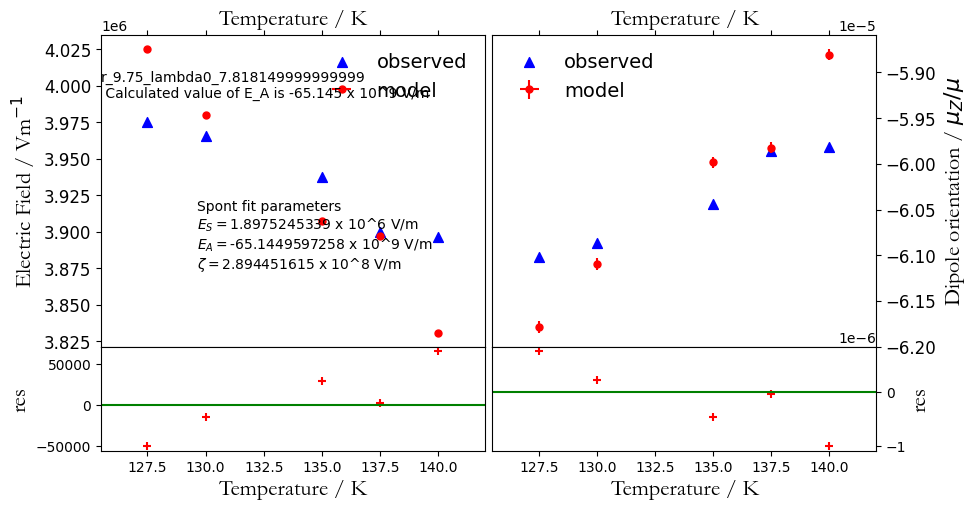

In [140]:
### To use the spont model to get values of dipole alignment based on inputting Es, Ea and zeta

### 
### Enter initial guesses
###

r_nm = 9.75#8.43 # best guess at initial "r" in _nm
Guess_E_S_Vm = 18.97524533939e5 #start_valu #2831269.909e6 #2.5441e6 # in V/m
Guess_E_A_Vm = -65.14495972576e9 # in V/m
Guess_zeta = 28.94451615025e7 #1.31878e8

#NOTE that E_A is taken from the calculated value below

#convert to au
r_au = r_nm*18.897259886 #convert radius_nm to au139.6764#
print('r_au is ', str(r_au))
E_S_au = Guess_E_S_Vm/5.1422e+11
E_A_Vm = Guess_E_A_Vm 
E_A_au = E_A_Vm/5.1422e+11

###
### Load in the data from the dataframe
###

#NOTE; below is used to get at calculated value of Ea for observed dipole alignment, the above entry for Ea gives value for spont model
IceMu = Solid_phase_dipole(density)*2.541746
print('IceMu is ',IceMu,  ' Debye')
E_A_static= -4*np.pi*(Solid_phase_dipole(density))/Omega
E_A_Vm_static = E_A_static*5.14220652e+11

#Uncomment the line below to enter a different value of Ea to that which is calculated above, and comment out the line above
#E_A_Vm = -70548889233.34218

print('Calculated value of E_A for '+name+' ; ', E_A_Vm_static/1E9, 'x 10^9 V/m')

# Get observed values for a starting value of r in au
Observed_field = Observed_Esp(r_au, DE_155)
Observed_alignment = Observed_field/Guess_E_A_Vm#E_A_Vm_static#Guess_E_A_Vm

#store these outputs in dataframes
SpontelData = pd.DataFrame(columns=['weight', 'y', 'sigma_y', 'calc_y','Temperature', 'sigma_T', 'Observed_field','Calc_field'])
SpontelData['Observed_field'] = (Observed_field)
SpontelData['y'] = (Observed_alignment)
SpontelData['sigma_y'] = abs(SpontelData['y'] * 0.001)
SpontelData['Temperature'] = xdataraw
SpontelData['sigma_T'] = [0.1] * len(SpontelData['Temperature'])
SpontelData['weight'] = [1] * len(SpontelData['Temperature'])
y=numpy.array(SpontelData.y)
sigy=numpy.array(SpontelData.sigma_y)
Temp=numpy.array(SpontelData.Temperature)
sigT=numpy.array(SpontelData.sigma_T)
Eobs=numpy.array(SpontelData.Observed_field)
weight=numpy.array(SpontelData.weight)

#define some empty arrays to hold data
ndata=len(weight)
ymodel=numpy.array([0.0]*ndata)
sqroot=numpy.array([0.0]*ndata)
sqroot_A=numpy.array([0.0]*ndata)
sqroot_B=numpy.array([0.0]*ndata)

#convert more numbers to au
Temp_au = Temp/315774.64
IceMu_au =  IceMu*0.393456

print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))
EScur = Guess_E_S_Vm
EAcur = Guess_E_A_Vm
ESzetacur = EScur*Guess_zeta

for i in range(0,ndata):
        
        #print('converged result before sending to langevin \ny[i] ',y[i], '\nIceMu ',IceMu,'\nEScur ',str(EScur),'\nEAcur ',str(EAcur),'\nESzetacur ',str(ESzetacur),'\nHTfunc[i] ',hTfunc[i],'\nTemp ',Temp[i])
        #print('converged result before sending to langevin \ny[i] ',y[i], '\nIceMu ',IceMu,'\nEScur ',str(EScur),'\nEAcur ',str(EAcur),'\nzetacur ',str(Guess_zeta),'\nTemp ',Temp[i])
        ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*1*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
        #sqroot_A[i] = (1+(E_A_au*IceMu_au)/(3*Temp_au[i]))**2 
        #sqroot_B[i] = ((4*IceMu_au**2)*E_S_au**2*Guess_zeta)/(9*(Temp_au[i]**2))
        #print('sqroot_A ' ,str(sqroot_A))
        #print('sqroot_B ' ,str(sqroot_B))
        #sqroot[i] = (sqroot_A[i]-sqroot_B[i])**0.5
        #ymodel[i]= (E_A_au*IceMu_au+3*Temp_au[i]-3*Temp_au[i]*sqroot[i])/(2*IceMu_au*E_S_au*Guess_zeta)
        
ymodel_E=Guess_E_A_Vm*ymodel
   
SpontelData['calc_y'] = ymodel
SpontelData['Calc_field'] = ymodel_E

    #Define text to print on each graph
string = ""
string = 'Spont fit parameters'
string+="\n"+"$E_S =$"+str(round(Guess_E_S_Vm/1E6,10))+' x 10^6 V/m'
string+="\n"+"$E_A =$"+str(round(Guess_E_A_Vm/1E9,10))+' x 10^9 V/m'
string+="\n"+"$\zeta =$"+str(round(Guess_zeta/1E8,10))+' x 10^8 V/m'
annotate=(string)

    #define residuals for plot (just for visualising)
res_E=Eobs-ymodel_E
res_mu=y-ymodel
    
r_i=str(r_au/18.897259886) #used for labelling graphs below
l0_j=str(l0_155)  #used for labelling graphs below
ij_space=('r_'+str(r_i)+'_lambda0_'+str(l0_155))
   
SpontelData['DE_eV'] = DE_eV_155
print(SpontelData)
#SpontelData.to_csv('SpontelData.csv', index=False)
print(SpontelData.y[0])
print(SpontelData.y[1])
print(SpontelData.y[2])
print(SpontelData.y[3])
print(SpontelData.y[4])
print('finished')
filename = 'filename_143'
PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm_static, filename)
 

<>:126: SyntaxWarning: invalid escape sequence '\z'
<>:126: SyntaxWarning: invalid escape sequence '\z'
C:\Users\au302163\AppData\Local\Temp\ipykernel_16416\3818256802.py:126: SyntaxWarning: invalid escape sequence '\z'
  string+="\n"+"$\zeta =$"+str(round(zeta_result/1E8,3))+' x 10^8 V/m'
C:\Users\au302163\AppData\Local\Temp\ipykernel_16416\3818256802.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  ymodel[i]= (E_A_au*IceMu_au+3*Temp_au[i]-3*Temp_au[i]*sqroot[i])/(2*IceMu_au*E_S_au*Guess_zeta)


IceMu is  3.000195645996226  Debye
Calculated value of E_A for water ;  -50.8860924595 x 10^9 V/m
   weight         y  sigma_y        calc_y  Temperature  sigma_T  \
0       1 -0.000103  0.00001  1.436489e-08        127.5      0.1   
1       1 -0.000102  0.00001  1.408853e-08        130.0      0.1   
2       1 -0.000101  0.00001  1.356654e-08        135.0      0.1   
3       1 -0.000100  0.00001  1.331979e-08        137.5      0.1   
4       1 -0.000098  0.00001  1.308185e-08        140.0      0.1   

   Observed_field  Calc_field     DE_eV  
0    5.222895e+06 -934.161160  0.166199  
1    5.195547e+06 -916.189643  0.160606  
2    5.138537e+06 -882.244175  0.149892  
3    5.092485e+06 -866.197564  0.142050  
4    4.984263e+06 -850.724252  0.125949  
finished


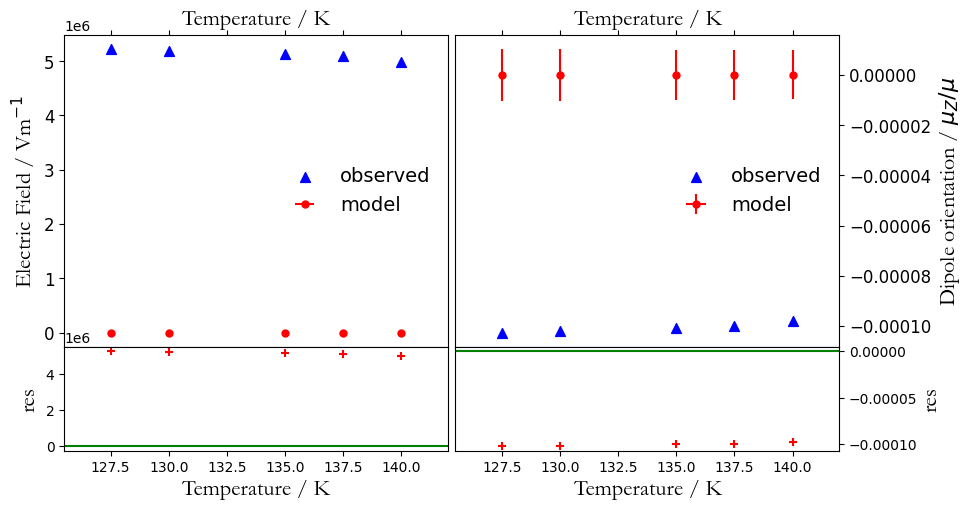

In [228]:
### To use the spont model to get values of dipole alignment based on inputting Es, Ea and zeta
### And now add curve fit to try to use least square method to directly improve the starting parameters.

### 
### Enter initial guesses
###

r_nm = 8.43 # best guess at initial "r" in _nm
Guess_E_S_Vm = 2.202e6 # in V/m
Guess_E_A_Vm = -5.088e10 # in V/m
Guess_zeta = 1.31878e8

#set limits for fitting; ES, EA, zeta should be in au
bounds_min = [1e-7, -0.15, 1e8 ]
bounds_max = [1e-4,-0.07,1e10]    
init_vals=[E_S_au , E_A_au , Guess_zeta]

#convert to au
r_au = r_nm*18.897259886 #convert radius_nm to au139.6764# 159.314
E_S_au = Guess_E_S_Vm/5.1422e+11
E_A_Vm = Guess_E_A_Vm 
E_A_au = E_A_Vm/5.1422e+11

## define the equation to fit to

def calc_ymodel(Temp_au, E_S_au, E_A_au, Guess_zeta):
    ymodel=numpy.array([0.0]*ndata)
    sqroot=numpy.array([0.0]*ndata, dtype = complex)
    sqroot_A=numpy.array([0.0]*ndata)
    sqroot_B=numpy.array([0.0]*ndata)

    for i in range(0,ndata):
        #print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))
        sqroot_A[i] = (1+(E_A_au*IceMu_au)/(3*Temp_au[i]))**2 
        sqroot_B[i] = ((4*IceMu_au**2)*E_S_au**2*Guess_zeta)/(9*(Temp_au[i]**2))
        #print('sqroot_A ' ,str(sqroot_A[i]))
        #print('sqroot_B ' ,str(sqroot_B[i]))
        if sqroot_A[i]>=sqroot_B[i]:
            sqroot[i] = (sqroot_A[i]-sqroot_B[i])**0.5
            ymodel[i]= (E_A_au*IceMu_au+3*Temp_au[i]-3*Temp_au[i]*sqroot[i])/(2*IceMu_au*E_S_au*Guess_zeta)

        else:
            print('NOTE - get a complex solution!')
            print('sqrootA - sqroot B = ',str(sqroot_A[i]-sqroot_B[i]))
            sqroot[i] = cmath.sqrt(sqroot_A[i]-sqroot_B[i])
            print(f"Complex solution: {sqroot[i].real} + {sqroot[i].imag}i")

            ymodel[i]= (E_A_au*IceMu_au+3*Temp_au[i]-3*Temp_au[i]*sqroot[i].real)/(2*IceMu_au*E_S_au*Guess_zeta)
    
    return(ymodel)

    #plt.plot(Temp_au,ymodel,'r+')


###
### Load in the data from the dataframe
###

#NOTE; below is used to get at calculated value of Ea for observed ipole alignment, the above entry for Ea gives value for spont model
IceMu = Solid_phase_dipole(density)*2.541746
print('IceMu is ',IceMu,  ' Debye')

E_A_static=-4*np.pi*(Solid_phase_dipole(density))/Omega
E_A_Vm_static = -5.08860924595e10 # E_A_static*5.14220652e+11

print('Calculated value of E_A for '+name+' ; ', E_A_Vm_static/1E9, 'x 10^9 V/m')

# Get observed values for a starting value of r in au
Observed_field = Observed_Esp_David(r_au, DE)
Observed_alignment = Observed_field/E_A_Vm_static 

#store these outputs in dataframes
SpontelData = pd.DataFrame(columns=['weight', 'y', 'sigma_y', 'calc_y','Temperature', 'sigma_T', 'Observed_field','Calc_field'])
SpontelData['Observed_field'] = (Observed_field)
SpontelData['y'] = (Observed_alignment)
SpontelData['sigma_y'] = abs(SpontelData['y'] * 0.1)
SpontelData['Temperature'] = xdataraw
SpontelData['sigma_T'] = [0.1] * len(SpontelData['Temperature'])
SpontelData['weight'] = [1] * len(SpontelData['Temperature'])
y=numpy.array(SpontelData.y)
sigy=numpy.array(SpontelData.sigma_y)
Temp=numpy.array(SpontelData.Temperature)

sigT=numpy.array(SpontelData.sigma_T)
Eobs=numpy.array(SpontelData.Observed_field)
weight=numpy.array(SpontelData.weight)

#define some empty arrays to hold data
ndata=len(weight)
ymodel=numpy.array([0.0]*ndata)
sqroot=numpy.array([0.0]*ndata)
sqroot_A=numpy.array([0.0]*ndata)
sqroot_B=numpy.array([0.0]*ndata)

#convert more numbers to au
Temp_au = Temp/315774.64
IceMu_au =  IceMu*0.393456

#print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))

## try curve fit
popt_Langevin, pcov_Langevin = curve_fit(calc_ymodel, Temp_au, y, p0=init_vals, bounds=(bounds_min,bounds_max))
#calculate errors and residuals:
perr_Langevin = np.sqrt(np.diag(pcov_Langevin)) # calculate the err on the fit

SpontelData['calc_y'] = calc_ymodel(Temp, *popt_Langevin)
ymodel=numpy.array(SpontelData.calc_y)
#residuals=sum((df['absorbance_bk']-(_3gaussian(df['wavelength'], *popt_3gauss)))**2)

ES_result = popt_Langevin[0]*5.14220652e+11
EA_result = popt_Langevin[1]*5.14220652e+11
zeta_result=popt_Langevin[2]

ymodel_E=EA_result*ymodel
SpontelData['Calc_field'] = ymodel_E

#define residuals for plot (just for visualising)
res_E=Eobs-ymodel_E
res_mu=y-ymodel     

    #Define text to print on each graph
string = ""
string = 'Spont fit parameters'
string+="\n"+"$E_S =$"+str(round(ES_result/1E6,3))+' x 10^6 V/m'
string+="\n"+"$E_A =$"+str(round(EA_result/1E9,3))+' x 10^9 V/m'
string+="\n"+"$\zeta =$"+str(round(zeta_result/1E8,3))+' x 10^8 V/m'
annotate=(string)
    
r_i=str(r_au/18.897259886) #used for labelling graphs below
l0_j=str(l0)  #used for labelling graphs below
ij_space=('r_'+str(r_i)+'_lambda0_'+str(l0))
   
SpontelData['DE_eV'] = DE_eV
print(SpontelData)
#SpontelData.to_csv('SpontelData.csv', index=False)
print('finished')
PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm_static, filename)
        



In [ ]:
### To use the spont model to get values of dipole alignment based on inputting Es, Ea and zeta
### Since curvefit doesnt work coz complex numbers, write our own fit routine

### 
### Enter initial guesses
###

r_nm = 8.43 # best guess at initial "r" in _nm
Guess_E_S_Vm = 2.19e6 # in V/m
Guess_E_A_Vm = -5.088e10 # in V/m
Guess_zeta = 1.31878e8

#set limits for fitting; ES, EA, zeta should be in au
bounds_min = [1e-7, -0.15, 1e8 ]
bounds_max = [1e-4,-0.07,1e10]    
init_vals=[E_S_au , E_A_au , Guess_zeta]

#convert to au
r_au = r_nm*18.897259886 #convert radius_nm to au139.6764# 159.314
E_S_au = Guess_E_S_Vm/5.1422e+11
E_A_Vm = Guess_E_A_Vm 
E_A_au = E_A_Vm/5.1422e+11

## define the equation to fit to

def calc_ymodel(Temp_au, E_S_au, E_A_au, Guess_zeta):
    
    ymodel=numpy.array([0.0]*ndata)
    sqroot=numpy.array([0.0]*ndata)
    sqroot_A=numpy.array([0.0]*ndata)
    sqroot_B=numpy.array([0.0]*ndata)
    print(itcnt)
    print('E_S_au ',str(E_S_au*5.1422e+11),'\n E_A_au ',str(E_A_au*5.1422e+11),'\n Guess_zeta ', str(Guess_zeta))
    
 
        
        
    
    

    for i in range(0,ndata):
        #print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))
        sqroot_A[i] = (1+(E_A_au*IceMu_au)/(3*Temp_au[i]))**2 
        sqroot_B[i] = ((4*IceMu_au**2)*E_S_au**2*Guess_zeta)/(9*(Temp_au[i]**2))
        #print('sqroot_A ' ,str(sqroot_A[i]))
        #print('sqroot_B ' ,str(sqroot_B[i]))
        if sqroot_A[i]>=sqroot_B[i]:
            sqroot[i] = (sqroot_A[i]-sqroot_B[i])**0.5
            ymodel[i]= (E_A_au*IceMu_au+3*Temp_au[i]-3*Temp_au[i]*sqroot[i])/(2*IceMu_au*E_S_au*Guess_zeta)

        else:
            raise RuntimeError('Negative square root encountered')
    
    return(ymodel)

    #plt.plot(Temp_au,ymodel,'r+')


###
### Load in the data from the dataframe
###

#NOTE; below is used to get at calculated value of Ea for observed ipole alignment, the above entry for Ea gives value for spont model
IceMu = Solid_phase_dipole(density)*2.541746
print('IceMu is ',IceMu,  ' Debye')

E_A_static=-4*np.pi*(Solid_phase_dipole(density))/Omega
E_A_Vm_static = -5.08860924595e10 # E_A_static*5.14220652e+11

print('Calculated value of E_A for '+name+' ; ', E_A_Vm_static/1E9, 'x 10^9 V/m')

# Get observed values for a starting value of r in au
Observed_field = Observed_Esp_David(r_au, DE)
Observed_alignment = Observed_field/E_A_Vm_static 

#store these outputs in dataframes
SpontelData = pd.DataFrame(columns=['weight', 'y', 'sigma_y', 'calc_y','Temperature', 'sigma_T', 'Observed_field','Calc_field'])
SpontelData['Observed_field'] = (Observed_field)
SpontelData['y'] = (Observed_alignment)
SpontelData['sigma_y'] = abs(SpontelData['y'] * 0.1)
SpontelData['Temperature'] = xdataraw
SpontelData['sigma_T'] = [0.1] * len(SpontelData['Temperature'])
SpontelData['weight'] = [1] * len(SpontelData['Temperature'])
y=numpy.array(SpontelData.y)
sigy=numpy.array(SpontelData.sigma_y)
Temp=numpy.array(SpontelData.Temperature)

sigT=numpy.array(SpontelData.sigma_T)
Eobs=numpy.array(SpontelData.Observed_field)
weight=numpy.array(SpontelData.weight)

#define some empty arrays to hold data
ndata=len(weight)
ymodel=numpy.array([0.0]*ndata)
sqroot=numpy.array([0.0]*ndata)
sqroot_A=numpy.array([0.0]*ndata)
sqroot_B=numpy.array([0.0]*ndata)

#convert more numbers to au
Temp_au = Temp/315774.64
IceMu_au =  IceMu*0.393456

#print('E_A_au ',str(E_A_au), '\nE_S_au ',str(E_S_au), '\nIceMu_au ',str(IceMu_au), '\nTemp[140 K]',str(Temp_au[4]))


best_error = float('inf')
best_params = None

itcnt = 0
for _ in range(1000):  # Adjust the range as needed
    try:
        params = numpy.random.uniform(low=bounds_min, high=bounds_max)  # Generate random parameters within your bounds
        ymodel = calc_ymodel(Temp_au, *params)
        error = ((y - ymodel)**2).sum()  # Calculate the sum of squared errors
        if error < best_error:
            best_error = error
            best_params = params
        itcnt += 1
        print(itcnt)
    except RuntimeError:
        print('complex solution')
        pass  # If a RuntimeError occurs (due to a negative sqrt), just skip these parameters

print(f'Best parameters: {best_params}')
print(f'Best error: {best_error}')

SpontelData['calc_y'] = calc_ymodel(Temp, *best_params)
ymodel=numpy.array(SpontelData.calc_y)
#residuals=sum((df['absorbance_bk']-(_3gaussian(df['wavelength'], *popt_3gauss)))**2)

ES_result = best_params[0]*5.14220652e+11
EA_result = best_params[1]*5.14220652e+11
zeta_result=best_params[2]

ymodel_E=EA_result*ymodel
SpontelData['Calc_field'] = ymodel_E

#define residuals for plot (just for visualising)
res_E=Eobs-ymodel_E
res_mu=y-ymodel     

    #Define text to print on each graph
string = ""
string = 'Spont fit parameters'
string+="\n"+"$E_S =$"+str(round(ES_result/1E6,3))+' x 10^6 V/m'
string+="\n"+"$E_A =$"+str(round(EA_result/1E9,3))+' x 10^9 V/m'
string+="\n"+"$\zeta =$"+str(round(zeta_result/1E8,3))+' x 10^8 V/m'
annotate=(string)
    
r_i=str(r_au/18.897259886) #used for labelling graphs below
l0_j=str(l0)  #used for labelling graphs below
ij_space=('r_'+str(r_i)+'_lambda0_'+str(l0))
   
SpontelData['DE_eV'] = DE_eV
print(SpontelData)
#SpontelData.to_csv('SpontelData.csv', index=False)
print('finished')
PlotSpontelData(xmin,xmax,Temp,sigT,ymodel_E,Eobs,annotate,xmin_mu,xmax_mu,ymodel,y,sigy,ij_space,res_E,res_mu,E_A_Vm_static, filename)
        



In [ ]:

r_nm_values = np.array([1,2,3,4,5,6,7,8])
l0_values = np.array([144.75])

r_nm_values_2D, l0_values_2D = np.meshgrid(r_nm_values, l0_values)
r_nm_values_3D, l0_values_3D, Efield_3D = np.meshgrid(r_nm_values, l0_values, Temp)

chi2_values = np.zeros(r_nm_values_2D.shape)
figofmerit_values_m = np.zeros(r_nm_values_2D.shape)
figofmerit_values_E = np.zeros(r_nm_values_2D.shape)
all_obs_E_field = np.zeros(r_nm_values_3D.shape)

print('I have a mesh with ', r_nm_values_3D.shape[1], ' values of r; ', r_nm_values_3D.shape[0] ,' values of l0 and ', r_nm_values_3D.shape[2],' spaces for E field values')

eps = (1.70172) #epsilon - usually take (refractive index)**2  - Kofman_2019_ApJ 
s_nm = 0.37 # David provided this value
mu_0_Debye = 3 # solid state dipole moment since this is known for water and avoids us recalculating it with topping equation
Omega_SI = 17.35e-30 # volume in m**3 from saga et al. (normally calculated based on polarizability, but don't do it this way for water ice).

#find the peak fit data
#os.chdir(working_dir)  
df = pd.read_csv(filename+'.txt', delim_whitespace=True, header=(0))
xdataraw = df.iloc[:,0] #Temperature K
ydataraw = df.iloc[:,1] #peak position nm      
        
#set up some graph parameters
T_array=xdataraw.to_numpy()
xmin_mu=min(T_array - 2)
xmax_mu=max(T_array + 2)
xmin=min(T_array - 2)
xmax=max(T_array + 2)
       
#convert units
lambda_nm=ydataraw
lambda_eV=1239.8/lambda_nm

for loop_index_i in range(r_nm_values_2D.shape[0]):
    for loop_index_j in range(r_nm_values_2D.shape[1]):
        #define i and j place in the matrix by scrolling through r and l0 values
        r_nm = r_nm_values_2D[loop_index_i, loop_index_j]
        l0 = l0_values_2D[loop_index_i, loop_index_j]
        r_i=str(r_nm)
        l0_j=str(l0)
        ij_space=('radius: '+r_i+' nm - and l0: '+l0_j+' nm')
        
        l0_eV=1239.8/l0
        DE_eV=(l0_eV-lambda_eV)
        #convert things to atomic units
        T=xdataraw*3.16683e-6
        DE=DE_eV*0.036749405469679
        r=r_nm*18.897259886  #radius in atomic units

        #Calculate the "observed" value of E field, based on an exciton expansion model        
        Esp_au=(1/96)*(
            -((32*DE)/r)
            +(
                (16*(2**(1/3))*DE*(6+DE*eps*r))
                /
                (r**3 *
                ((((DE**2*eps**2 *r**(0.5))*(-9+2*DE*eps*r))+3*(3**(0.5))*(-DE**3 *eps**3 *(32+DE*eps*r*(13+4*DE*eps*r)))**0.5)
                /
                (r**(9/2))
                )**(1/3)
                )
            )
            +
            (
                (8*(2**(2/3))*
                ((((DE**2 *eps**2 *r**(0.5))*(-9+2*DE*eps*r))+3*(3**(0.5))*(-DE**3 *eps**3 *(32+DE*eps*r*(13+4*DE*eps*r)))**0.5)
                /
                 (r**(9/2))
                )**(1/3))
                /
                (eps))
        )

        Esp_Vm=Esp_au*5.14220652e+11
        Esp_Vm_array=Esp_Vm.to_numpy()
        ymin=min(Esp_Vm_array) - 0.01*(Esp_Vm_array[-1])
        ymax=max(Esp_Vm_array) + 0.01*(Esp_Vm_array[-1])
        
        #Convert this E field into degree of dipole alignment
        #first calculate E_a        
        s = (s_nm)*18.897  # estimated layer spacing converted to au
        mu_0 = (mu_0_Debye*0.393456)  #  solid state dipole converted to au

        Omega = Omega_SI*18897259886**3 # convert volume to au
        water_radius_AU = ((3/(4*np.pi))**(1/3))*(Omega**(1/3))
        
        E_A=4*np.pi*mu_0/Omega
        E_A_Vm = E_A*5.14220652e+11      

        degree_of_alignment=Esp_Vm/E_A_Vm
        muz_mu0_array=degree_of_alignment.to_numpy()
        ymin_mu=min(muz_mu0_array) - 0.01*(muz_mu0_array[-1])
        ymax_mu=max(muz_mu0_array) + 0.01*(muz_mu0_array[-1])
       
        #now save E_sp and degree_of_alignment to a file to access later
        length=(len(T_array))
        np.ones(length)
        err_muz_mu0=0.1*(muz_mu0_array)
        err_T=np.ones(length)   #0.1*(T_array)
        
        os.chdir('observed_data')
        data=np.column_stack((weight,muz_mu0_array,err_muz_mu0,T_array,err_T,Esp_Vm_array))#,mu_0,E_A_Vm))
        header='weight,y,sigma_y,Temperature,sigma_T,Observed_field'

        with open('data for_'+name+'.csv', mode='w', ) as newfile: 
            np.savetxt(newfile,data, header=header,delimiter=',',comments='') 
    
        os.chdir('..')  
        
        os.chdir('observed_data')
		
        SpontelData = pandas.read_csv('data for_'+name+'.csv')
        os.chdir('..') 
        #SpontelData.head()
    # Main driver programme for fitting Spontelectric field data
    # 
    # Define several conversion factors to/from atomic units
    # conversion of Temp to a.u. : T [a.u.]= T [K]/factor
        Ttoau=315770.0
    # conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
        Debye=0.393456
    # Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
        Etoau=5.142e11
 
        htfc=numpy.array([0.0]*4)
 
    # Find the value of mu for this ice 
        IceMu=mu_0_Debye
    
    # Provide a first guess value for the parameter E_A
        EAnxt=E_A_Vm
    
        htfc[0]=1.0
        htfc[1]=0.0
        htfc[2]=0.0
        htfc[3]=0.0
    
        weight=numpy.array(SpontelData.weight)
        ndata=len(weight)
    # y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
    # sig are the 1-sigma measurement errors
    # E observed is the observed Electric field in units [V/m]
        y=numpy.array(SpontelData.y)
        sigy=numpy.array(SpontelData.sigma_y)
        Temp=numpy.array(SpontelData.Temperature)
        sigT=numpy.array(SpontelData.sigma_T)
        Eobs=numpy.array(SpontelData.Observed_field)
    #
    # here comes a block of variable declarations
        whtsum=0.0
        yinvmn=0.0
        hTfunc=numpy.array([0.0]*ndata)
        DerhTfunc=numpy.array([0.0]*ndata)
        DerGT=numpy.array([0.0]*ndata)
        DerGy=numpy.array([0.0]*ndata)
        PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
        xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
        ydat=numpy.array([0.0]*ndata)
        zdat=numpy.array([0.0]*ndata)
        ymodel=numpy.array([0.0]*ndata)
        DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
        DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
        SigPar=numpy.array([0.0]*3)
#
#
# Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
# These are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
# partial derivatives of the function G with respect to T and y.
        for i in range(0,ndata):
            yinvmn+=weight[i]/y[i]
            whtsum+=weight[i]
            hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
            DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
            PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
            PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
            PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
            PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
#
# start the iteration to get the parameters, initialise a choice for E_A
        yinvmn=yinvmn/whtsum
        EAcur=1.1*EAnxt
        itcnt=0
        while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
            itcnt+=1
            EAcur=EAnxt
            for i in range(0,ndata):
                xdat[0,i]=PartDerv[1,i]
                xdat[1,i]=PartDerv[3,i]
                ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
#
            Constrout=ConstrLSQ(xdat,ydat,weight)
#
# FPP (02/06/2022): here E_S and zeta always are forced to be >= 0
            EScur=abs(Constrout[0]*Etoau)
            ESzetacur=abs(Constrout[1]*Etoau)
            ratiolog=0.0
            for i in range(0,ndata) :
                Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
                ratiolog+=weight[i]*(math.log(abs(EAcur*Langevin(Ezmod)))-math.log(Eobs[i]))
                DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
                DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
                DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
                DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
            ratiolog=ratiolog/whtsum
            if ((Constrout[0]<0) and (EAcur<0) and (yinvmn<0) and (ratiolog>0)) :
                EAnxt=EAcur+2.0*yinvmn*EScur
            else :
                EAnxt=EAcur/math.exp(ratiolog)
            if (itcnt>40) : 
                print ("iteration count exceeded: not converged")
#
# for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
#
# also calculate the quality of the fit (chi-square) dlsqsum
        dlsqsum=0
        for i in range(0,ndata) :
            ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
            DelMod=y[i]-ymodel[i]
            dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
        #print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
            DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
            DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
            DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
            DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
            DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
            DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
#
        dlsqsum=dlsqsum/(whtsum-2)
# calculate the 1-sigma uncertainties for the parameters
        for k in range(0,3):
            for i in range(0,ndata) :
                SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
            SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)  

        zetacur=ESzetacur/EScur
        ymodel_E=EAcur*ymodel

#Define text to print on each graph
        SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
        string = 'Spont fit parameters'
        string+="\n"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
        string+="\n"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
        string+="\n"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
        string+="\n\n"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"\n"

        annotate=(string)

#define residuals for plot (just for visualising)
        res_E=Eobs-ymodel_E
        res_mu=y-ymodel
      
#FigureMu(Temp,ymodel,y,sigT,sigy,xmin_mu,xmax_mu,ymin_mu,ymax_mu,name)
#ymodel=EAcur*ymodel
#FigureE(Temp,ymodel,Eobs,xmin,xmax,ymin,ymax,name)

        fig, ax = plt.subplots(2, 2, sharex=True, gridspec_kw={'height_ratios':[3,1]}, figsize=(10, 5.4))
        fig.subplots_adjust(hspace=0)
        fig.subplots_adjust(wspace=0.02)
        
#plt.title(ij_space)
        ax[0,0].set_xlim(xmin, xmax)
        #ax[0,0].set_ylim(ymin, ymax)
        ax[0,0].scatter(Temp, ymodel_E, marker='+', s=40, color='red', label='model')
        ax[0,0].scatter(Temp, Eobs, marker='o', s=40, color='blue', label='observed')
    #ax.set_yticks(tick)
        ax[0,0].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
        ax[0,0].xaxis.set_label_position("top")
        ax[0,0].xaxis.tick_top()
        ax[0,0].set_ylabel('Electric Field / Vm$^{-1}$', fontsize=16, fontname='garamond')
        ax[0,0].tick_params(labelsize='large')
        ax[0,0].legend(loc=0, fontsize=14, framealpha=0)
        ax[0,0].text(xmin,ymin,annotate)
    
        ax[0,1].set_xlim(xmin_mu, xmax_mu)
        #ax[0,1].set_ylim(ymin_mu, ymax_mu)
        ax[0,1].errorbar(Temp, ymodel, markersize=10, xerr=sigT, yerr=sigy, fmt='.', color='red', label='model')
        ax[0,1].scatter(Temp, y, marker='^', s=50, color='blue', label='observed')
        ax[0,1].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
        ax[0,1].xaxis.set_label_position("top")
        ax[0,1].xaxis.tick_top()
        ax[0,1].yaxis.set_label_position("right")
        ax[0,1].yaxis.tick_right()
        ax[0,1].set_ylabel('Dipole orientation / $\mu_Z/\mu$', fontsize=16, fontname='garamond')
        ax[0,1].tick_params(labelsize='large')
        ax[0,1].legend(loc=0, fontsize=14, framealpha=0)
        ax[0,1].text(xmin_mu,ymin_mu,ij_space+'\n Calculated value of E_A is '+str(round(E_A_Vm/1E9,3))+' x 10^9 V/m')
#ax[0,1].text(20,0,legend_mu)
    
        ax[1,0].scatter(Temp, res_E, marker='+', s=40, color='red', label='observed')
        ax[1,0].axhline(y = 0.0, color = 'g', linestyle = '-')
        ax[1,0].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
        ax[1,0].set_ylabel('res', fontsize=16, fontname='garamond')
    
        ax[1,1].scatter(Temp, res_mu, marker='+', s=40, color='red', label='observed')
        ax[1,1].yaxis.set_label_position("right")
        ax[1,1].axhline(y = 0.0, color = 'g', linestyle = '-')
        ax[1,1].yaxis.tick_right()
        ax[1,1].set_xlabel('Temperature / K', fontsize=16, fontname='garamond')
        ax[1,1].set_ylabel('res', fontsize=16, fontname='garamond')
       

        
        short_ij=('r_'+str(r_nm)+'_lambda0_'+str(l0))
        os.chdir('Spont fit')
        plt.savefig('Spont fit for'+short_ij+'.png')    
    
        zetacur=ESzetacur/EScur
        
        SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
        string = name
        string+="<br>"+"$E_S =$"+NeaterOut(EScur,SigPar[0])
        string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
        string+="<br>"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
        string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
        #display(Markdown(string)) #Use this line to see the individual results for fitting parameters per dataset
    
        ES=NeaterOut(EScur,SigPar[0])
        EA=NeaterOut(EAcur,SigPar[1])
        zeta=NeaterOut(zetacur,SigPar[2])
        os.chdir('..')  
        
        chi2_values[loop_index_i, loop_index_j] = dlsqsum
        ES_test=(EScur/5.14220652e+11)
        EA_test=(EAcur/5.14220652e+11)
        zeta_test=(zetacur)

        m_check= - (T/(mu_0*((-EA_test*muz_mu0_array)+ES_test*(1+(muz_mu0_array**2)*zeta_test)))) + 1/(np.tanh((mu_0*(-EA_test*muz_mu0_array+ES_test*(1+(muz_mu0_array**2)*zeta_test)))/T))
        E_check = np.sum(((ymodel_E-Eobs)**2)**0.5)
        figofmerit_E = E_check #some estimate of errors based on least squares regression
        figofmerit_m = np.sum(((m_check-muz_mu0_array)**2)**0.5) 
        
        figofmerit_values_m[loop_index_i, loop_index_j] = figofmerit_m
        figofmerit_values_E[loop_index_i, loop_index_j] = figofmerit_E
                
        #Also, save the plots of each obs E field, because this changes a lot as r and l0 vary
        
        for loop_index_z in range(r_nm_values_3D.shape[2]):    
            Efield = Eobs[loop_index_z]   
            all_obs_E_field[loop_index_i, loop_index_j, loop_index_z] = Efield                          
        

In [ ]:
fig, ax = plt.subplots()

c = ax.contourf(r_nm_values, l0_values, chi2_values)

ax.set_xlabel('radius / nm', fontsize=16, fontname='garamond')
ax.set_ylabel('lambda_0 / nm', fontsize=16, fontname='garamond')
ax.set_title(name)

fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
fig, ax = plt.subplots()

c = ax.contourf(r_nm_values, l0_values, figofmerit_values_m)

ax.set_xlabel('radius / nm', fontsize=16, fontname='garamond')
ax.set_ylabel('lambda_0 / nm', fontsize=16, fontname='garamond')
ax.set_title(name  + '  m as figure of merit')

fig.colorbar(c, ax=ax)

plt.show()

array_1d_m = figofmerit_values_m.reshape(-1)
nor_figofmerit_values_m=(figofmerit_values_m/max(array_1d_m))
inv_figofmerit_values_m=1-nor_figofmerit_values_m

fig, ax = plt.subplots()

c = ax.contourf(r_nm_values, l0_values, figofmerit_values_E)

ax.set_xlabel('radius / nm', fontsize=16, fontname='garamond')
ax.set_ylabel('lambda_0 / nm', fontsize=16, fontname='garamond')
ax.set_title(name + '  E as figure of merit')

fig.colorbar(c, ax=ax)

plt.show()

In [ ]:

for wavelength_zero in range (r_nm_values_3D.shape[0]):
    colour_list=['b','g','c','k','r','y','m','b','g']
    line_style_list=['-','--',':','-.','-','--',':','-.','-','--']
    for radii in range(r_nm_values_3D.shape[1]):
        text_string = ('r = ', r_nm_values[radii], ' nm ; l0 = ', l0_values[wavelength_zero], ' nm')
        line_style=(colour_list[radii] + line_style_list[wavelength_zero])
        
        plt.plot(Temp, all_obs_E_field[wavelength_zero][radii], line_style, linewidth=2*inv_figofmerit_values_m[wavelength_zero][radii], label=text_string)
        #plt.yscale('log')
        plt.legend(loc=(1.04, 0))
        plt.title('range of observed E fields for '+name)
        plt.xlabel('Temperature / K')
        plt.ylabel('Observed E field V/m')
        plt.text(127.5,max(all_obs_E_field.reshape(-1)),'thicker lines gave better fit',)